## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=300

## Import Datasets and Merged

In [2]:
# Read the churn data from CSV file
df = pd.read_csv('churn_data.csv')

# Display the first few rows of the DataFrame
df.head()

customerID  tenure PhoneService        Contract PaperlessBilling  \
0  7590-VHVEG       1           No  Month-to-month              Yes   
1  5575-GNVDE      34          Yes        One year               No   
2  3668-QPYBK       2          Yes  Month-to-month              Yes   
3  7795-CFOCW      45           No        One year               No   
4  9237-HQITU       2          Yes  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges Churn  
0           Electronic check           29.85        29.85    No  
1               Mailed check           56.95       1889.5    No  
2               Mailed check           53.85       108.15   Yes  
3  Bank transfer (automatic)           42.30      1840.75    No  
4           Electronic check           70.70       151.65   Yes

In [3]:
df1=pd.read_csv('customer_data.csv')
df1.head()

customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No

In [4]:
df2=pd.read_csv('internet_data.csv')
df2.head()

customerID     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  7590-VHVEG  No phone service             DSL             No          Yes   
1  5575-GNVDE                No             DSL            Yes           No   
2  3668-QPYBK                No             DSL            Yes          Yes   
3  7795-CFOCW  No phone service             DSL            Yes           No   
4  9237-HQITU                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies  
0               No          No          No              No  
1              Yes          No          No              No  
2               No          No          No              No  
3              Yes         Yes          No              No  
4               No          No          No              No

In [5]:
# Merge df2 and df1 on the 'customerID' column using a left join
df3 = pd.merge(df2, df1, on='customerID', how='left')

# Display the first few rows of df3
df3.head()

customerID     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  7590-VHVEG  No phone service             DSL             No          Yes   
1  5575-GNVDE                No             DSL            Yes           No   
2  3668-QPYBK                No             DSL            Yes          Yes   
3  7795-CFOCW  No phone service             DSL            Yes           No   
4  9237-HQITU                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies  gender  \
0               No          No          No              No  Female   
1              Yes          No          No              No    Male   
2               No          No          No              No    Male   
3              Yes         Yes          No              No    Male   
4               No          No          No              No  Female   

   SeniorCitizen Partner Dependents  
0              0     Yes         No  
1              0      No         No  
2              0      No         No  
3              0      No         No  
4              0      No         No

In [6]:
#    Merges two dataframes based on the 'customerID' column using a left join.
df=pd.merge(df3,df,on='customerID',how='left')
df

customerID     MultipleLines InternetService OnlineSecurity  \
0     7590-VHVEG  No phone service             DSL             No   
1     5575-GNVDE                No             DSL            Yes   
2     3668-QPYBK                No             DSL            Yes   
3     7795-CFOCW  No phone service             DSL            Yes   
4     9237-HQITU                No     Fiber optic             No   
...          ...               ...             ...            ...   
7038  6840-RESVB               Yes             DSL            Yes   
7039  2234-XADUH               Yes     Fiber optic             No   
7040  4801-JZAZL  No phone service             DSL            Yes   
7041  8361-LTMKD               Yes     Fiber optic             No   
7042  3186-AJIEK                No     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0             Yes               No          No          No              No   
1              No              Yes          No          No              No   
2             Yes               No          No          No              No   
3              No              Yes         Yes          No              No   
4              No               No          No          No              No   
...           ...              ...         ...         ...             ...   
7038           No              Yes         Yes         Yes             Yes   
7039          Yes              Yes          No         Yes             Yes   
7040           No               No          No          No              No   
7041           No               No          No          No              No   
7042           No              Yes         Yes         Yes             Yes   

      gender  ...  Partner Dependents tenure  PhoneService        Contract  \
0     Female  ...      Yes         No      1            No  Month-to-month   
1       Male  ...       No         No     34           Yes        One year   
2       Male  ...       No         No      2           Yes  Month-to-month   
3       Male  ...       No         No     45            No        One year   
4     Female  ...       No         No      2           Yes  Month-to-month   
...      ...  ...      ...        ...    ...           ...             ...   
7038    Male  ...      Yes        Yes     24           Yes        One year   
7039  Female  ...      Yes        Yes     72           Yes        One year   
7040  Female  ...      Yes        Yes     11            No  Month-to-month   
7041    Male  ...      Yes         No      4           Yes  Month-to-month   
7042    Male  ...       No         No     66           Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

## EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   MultipleLines     7043 non-null   object 
 2   InternetService   7043 non-null   object 
 3   OnlineSecurity    7043 non-null   object 
 4   OnlineBackup      7043 non-null   object 
 5   DeviceProtection  7043 non-null   object 
 6   TechSupport       7043 non-null   object 
 7   StreamingTV       7043 non-null   object 
 8   StreamingMovies   7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  tenure            7043 non-null   int64  
 14  PhoneService      7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Convert values in the 'TotalCharges' column to float, replacing any spaces with 'NAN'
df['TotalCharges'] = [float(str(i).replace(" ", 'NAN')) for i in df['TotalCharges']]


In [9]:
# Count the number of missing values in each column of the dataframe
df.isna().sum()

customerID           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# Drop rows with missing values
df.dropna(inplace=True)

# Count the number of missing values in each column
df.isna().sum()

customerID          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.shape

(7032, 21)

In [13]:
colm=df.columns
colm

Index(['customerID', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
# Print unique values for columns with less than 10 unique values
for i in (colm):
    if df[i].nunique()<10:
        print(i,":")
        print(df[i].unique())


MultipleLines :
['No phone service' 'No' 'Yes']
InternetService :
['DSL' 'Fiber optic' 'No']
OnlineSecurity :
['No' 'Yes' 'No internet service']
OnlineBackup :
['Yes' 'No' 'No internet service']
DeviceProtection :
['No' 'Yes' 'No internet service']
TechSupport :
['No' 'Yes' 'No internet service']
StreamingTV :
['No' 'Yes' 'No internet service']
StreamingMovies :
['No' 'Yes' 'No internet service']
gender :
['Female' 'Male']
SeniorCitizen :
[0 1]
Partner :
['Yes' 'No']
Dependents :
['No' 'Yes']
PhoneService :
['No' 'Yes']
Contract :
['Month-to-month' 'One year' 'Two year']
PaperlessBilling :
['Yes' 'No']
PaymentMethod :
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :
['No' 'Yes']


### Data information

  **customerID:** Customer ID

  **MultipleLines:** Whether the customer has multiple lines or not (Yes, No, No phone service)

  **InternetService:** Customer’s internet service provider (DSL, Fiber optic, No)

  **OnlineSecurity:** Whether the customer has online security or not (Yes, No, No internet service)

  **OnlineBackup:** Whether the customer has online backup or not (Yes, No, No internet service)

  **DeviceProtection:** Whether the customer has device protection or not (Yes, No, No internet service)

  **TechSupport:** bold text Whether the customer has tech support or not (Yes, No, No internet service)

  **StreamingTV:** Whether the customer has streaming TV or not (Yes, No, No internet service)

  **StreamingMovies:** Whether the customer has streaming movies or not (Yes, No, No internet service)

  **gender:** gender (female, male)

  **SeniorCitizen:** Whether the customer is a senior citizen or not (1, 0)

  **PartnerWhether:** the customer has a partner or not (Yes, No)

  **Dependents:** Whether the customer has dependents or not (Yes, No)

  **tenure:** Number of months the customer has stayed with the company

  **PhoneService:** Whether the customer has a phone service or not (Yes, No)

  **Contract:** The contract term of the customer (Month-to-month, One year, Two year)

  **PaperlessBilling:** Whether the customer has paperless billing or not (Yes, No)

  **PaymentMethod:** The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

  **MonthlyCharges:** The amount charged to the customer monthly

  **TotalCharges:** The total amount charged to the customer

  **Churn:** Whether the customer churned or not (Yes or No)

In [ ]:
# Replace 'No internet service' with 'No' in the dataframe as both are same
df = df.replace('No internet service', value='No')

# Count the values of the 'OnlineSecurity' column
df['OnlineSecurity'].value_counts()

In [16]:
# Replace 'No phone service' with 'No' in the 'df' DataFrame
df = df.replace('No phone service', value='No')

# Count the values in the 'MultipleLines' column of the 'df' DataFrame
df['MultipleLines'].value_counts()


No     4065
Yes    2967
Name: MultipleLines, dtype: int64

In [17]:
# Get the descriptive statistics for object columns in the DataFrame
df.describe(include='object').T


count unique               top  freq
customerID        7032   7032        7590-VHVEG     1
MultipleLines     7032      2                No  4065
InternetService   7032      3       Fiber optic  3096
OnlineSecurity    7032      2                No  5017
OnlineBackup      7032      2                No  4607
DeviceProtection  7032      2                No  4614
TechSupport       7032      2                No  4992
StreamingTV       7032      2                No  4329
StreamingMovies   7032      2                No  4301
gender            7032      2              Male  3549
Partner           7032      2                No  3639
Dependents        7032      2                No  4933
PhoneService      7032      2               Yes  6352
Contract          7032      3    Month-to-month  3875
PaperlessBilling  7032      2               Yes  4168
PaymentMethod     7032      4  Electronic check  2365
Churn             7032      2                No  5163

In [18]:
# Calculate descriptive statistics for the DataFrame
df.describe()


SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

In [19]:
# Calculate the correlation matrix of the DataFrame
df.corr()

SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.015683        0.219874      0.102411
tenure               0.015683  1.000000        0.246862      0.825880
MonthlyCharges       0.219874  0.246862        1.000000      0.651065
TotalCharges         0.102411  0.825880        0.651065      1.000000

In [20]:
# Count the occurrences of each value in the 'Churn' column
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

## Visualization

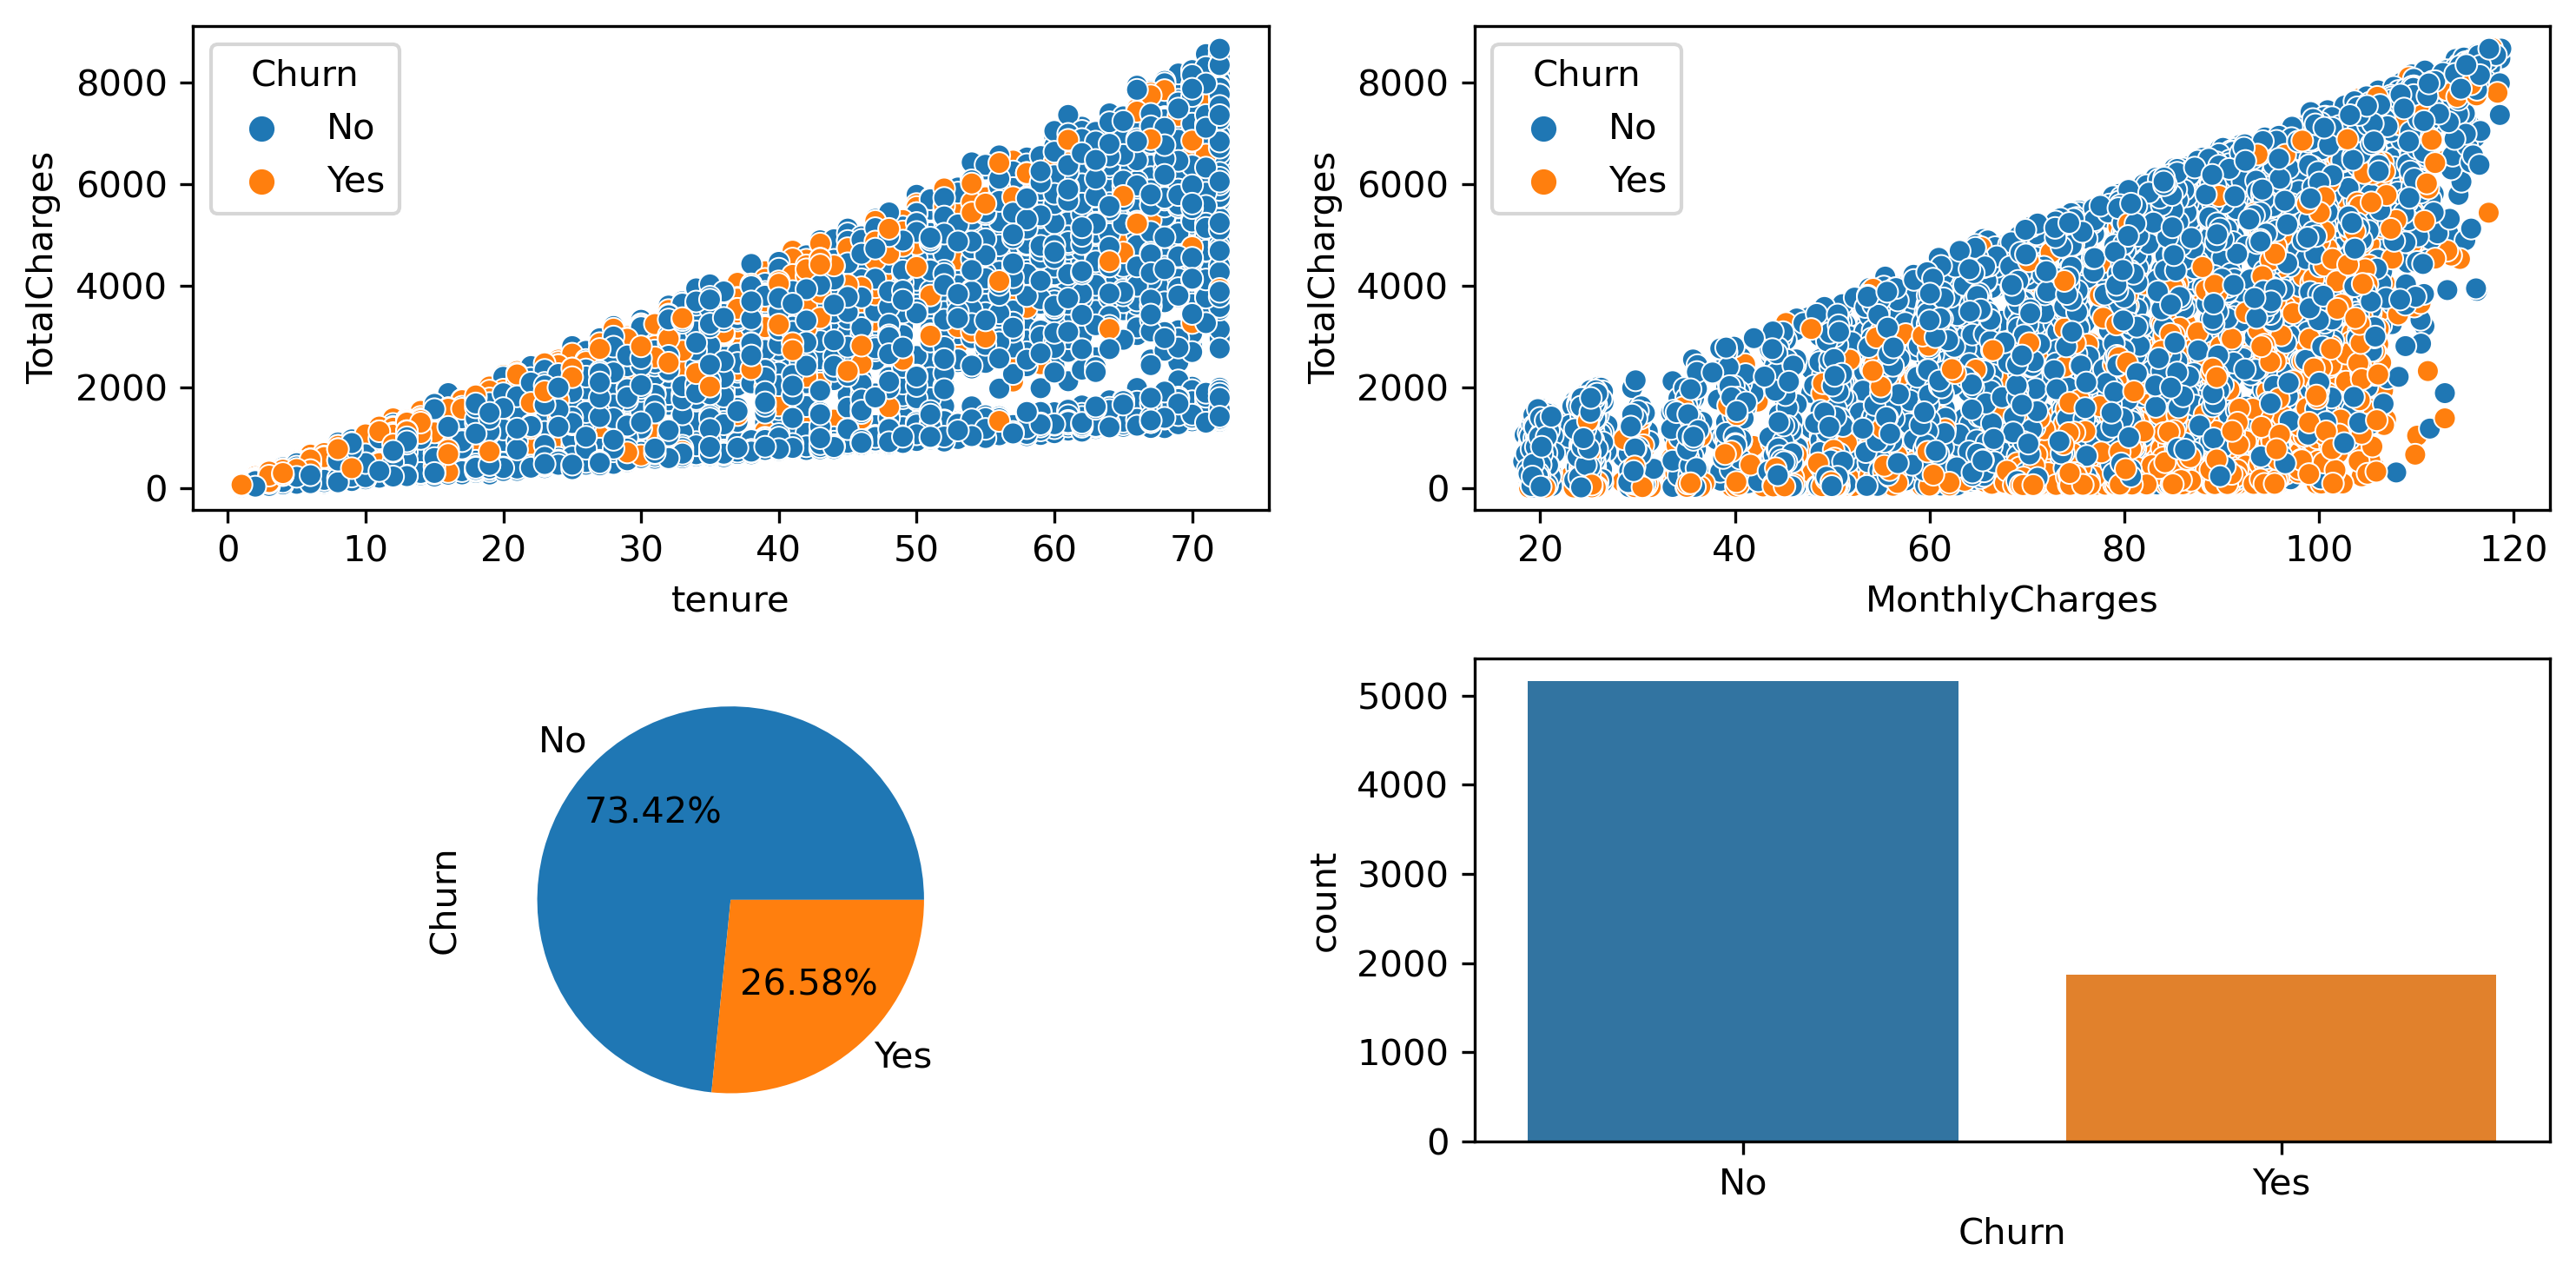

In [21]:
# Create a 2x2 subplot grid
fig, index = plt.subplots(2, 2)

# Scatter plot of 'tenure' vs 'TotalCharges' with 'Churn' as hue
sns.scatterplot(df['tenure'], df['TotalCharges'], hue=df['Churn'], ax=index[0, 0])

# Scatter plot of 'MonthlyCharges' vs 'TotalCharges' with 'Churn' as hue
sns.scatterplot(df['MonthlyCharges'], df['TotalCharges'], hue=df['Churn'], ax=index[0, 1])

# Pie chart of 'Churn' value counts
df['Churn'].value_counts().plot(kind='pie', autopct="%0.2f%%", ax=index[1, 0])

# Count plot of 'Churn'
sns.countplot(x='Churn', data=df, ax=index[1, 1])

# Adjust subplot layout for better spacing
plt.tight_layout()

In [22]:
# Setting the theme and palette for the plot

sns.set_theme(style='darkgrid', palette='rainbow')

In [23]:
# Remove the 'customerID' column from the DataFrame
df.drop(columns='customerID',inplace=True)

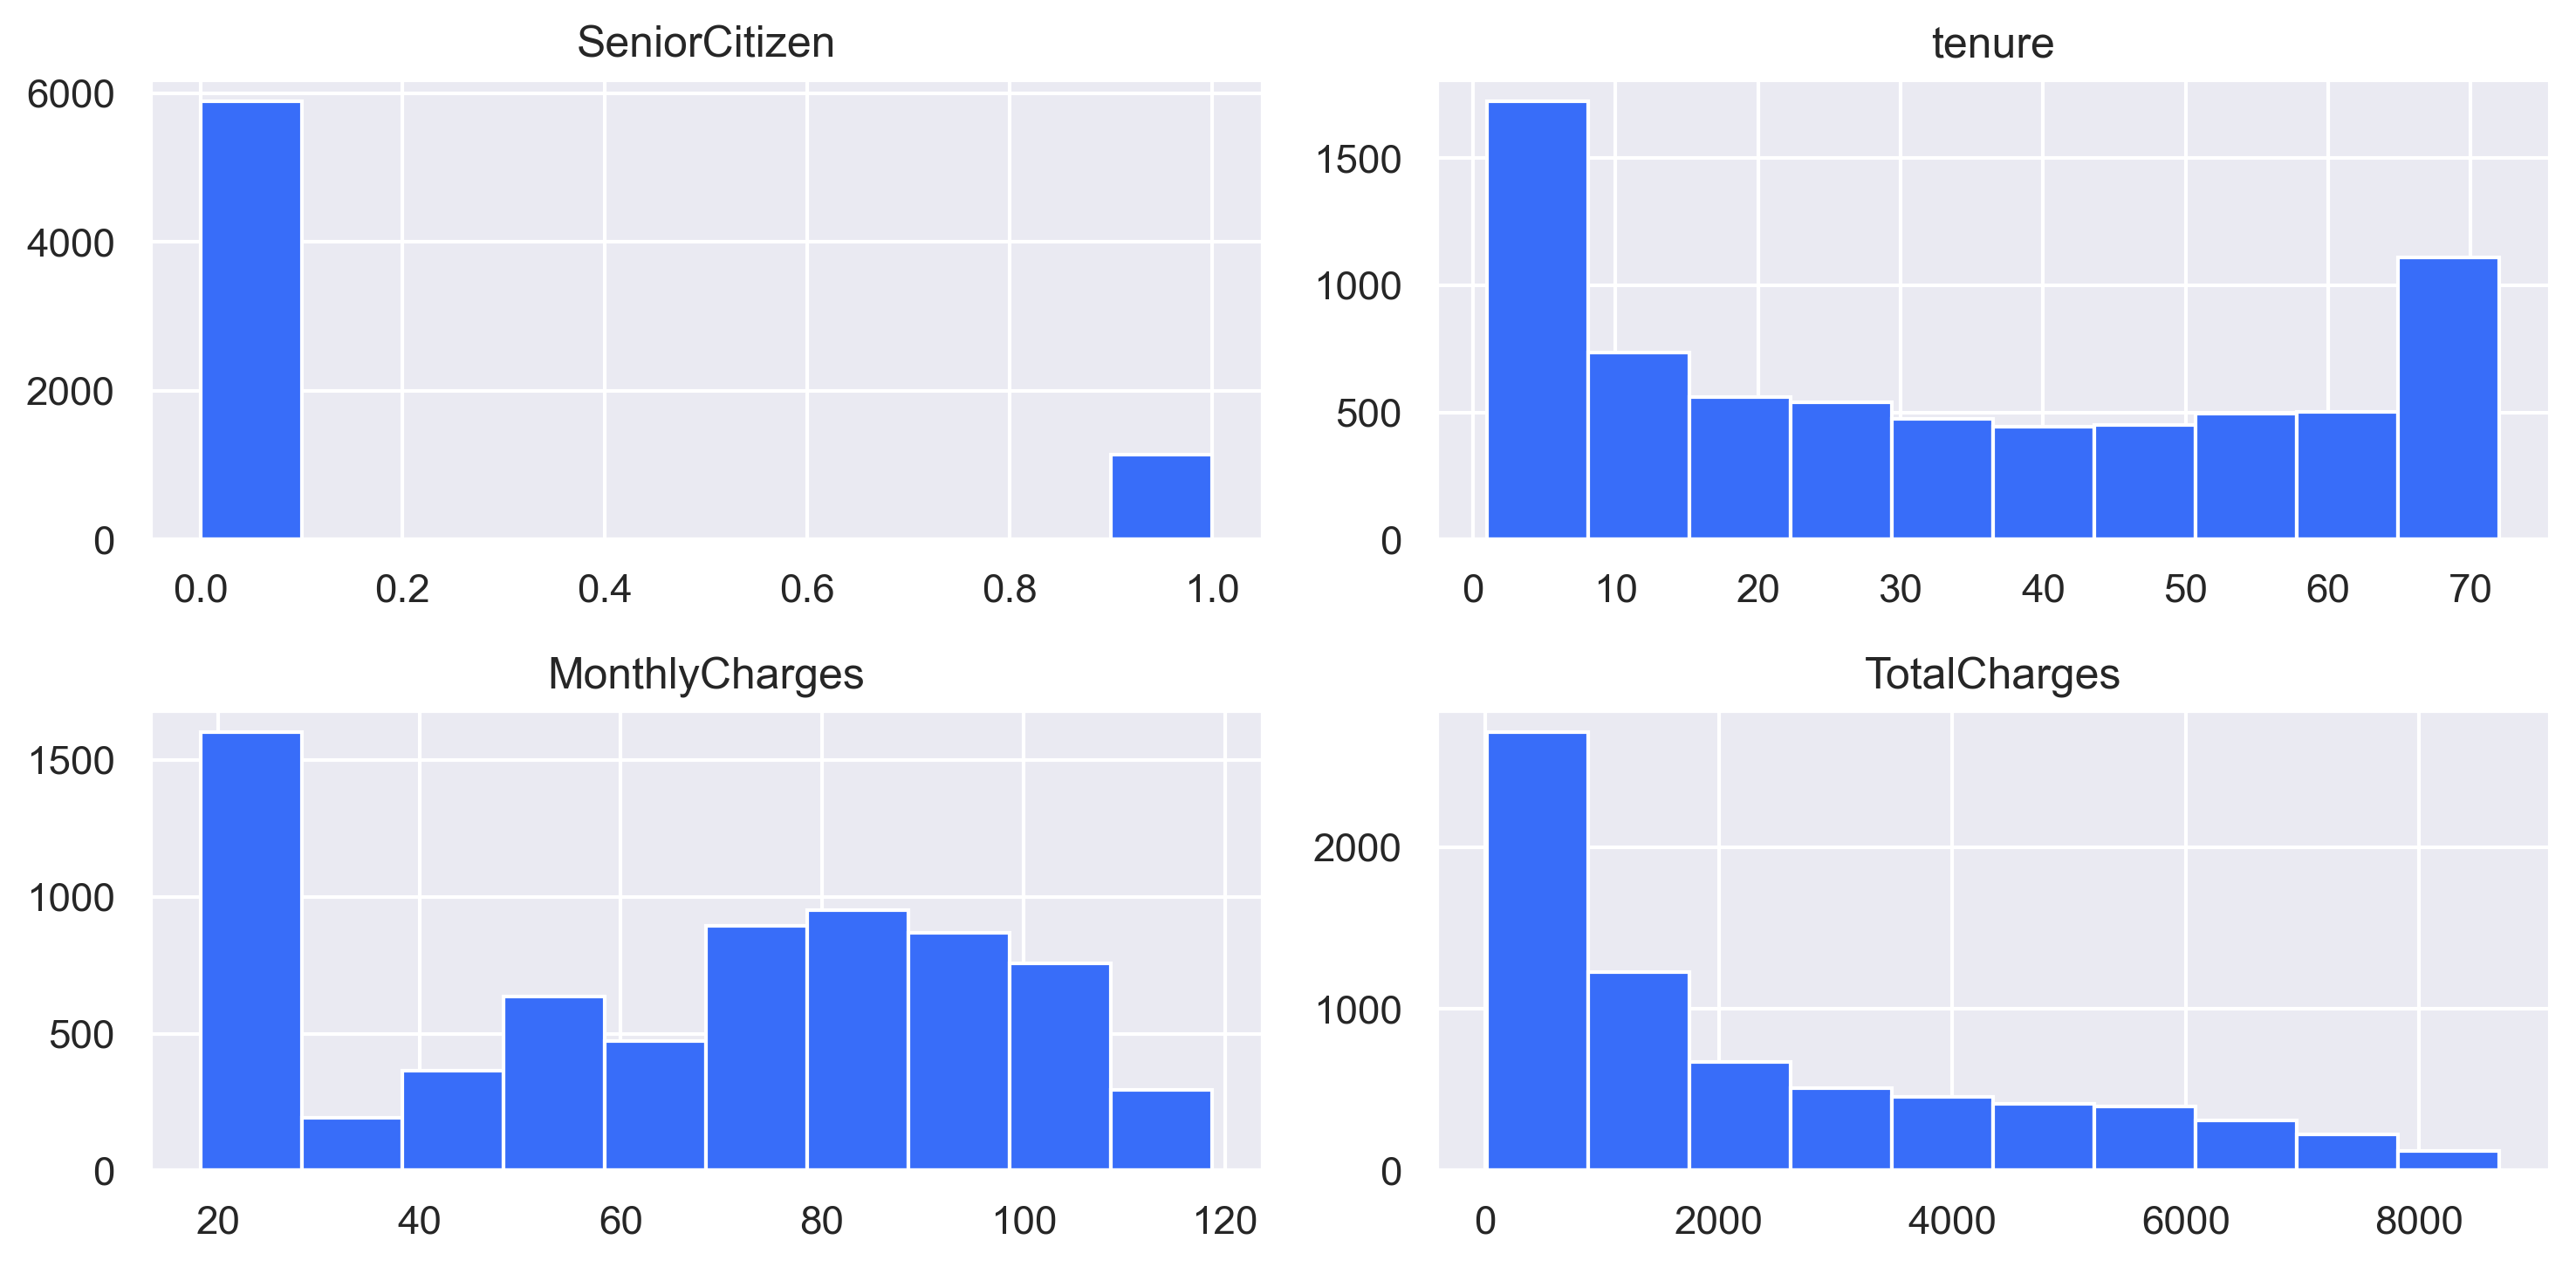

In [24]:
#Plot a histogram of the dataframe.
df.hist()
plt.tight_layout()

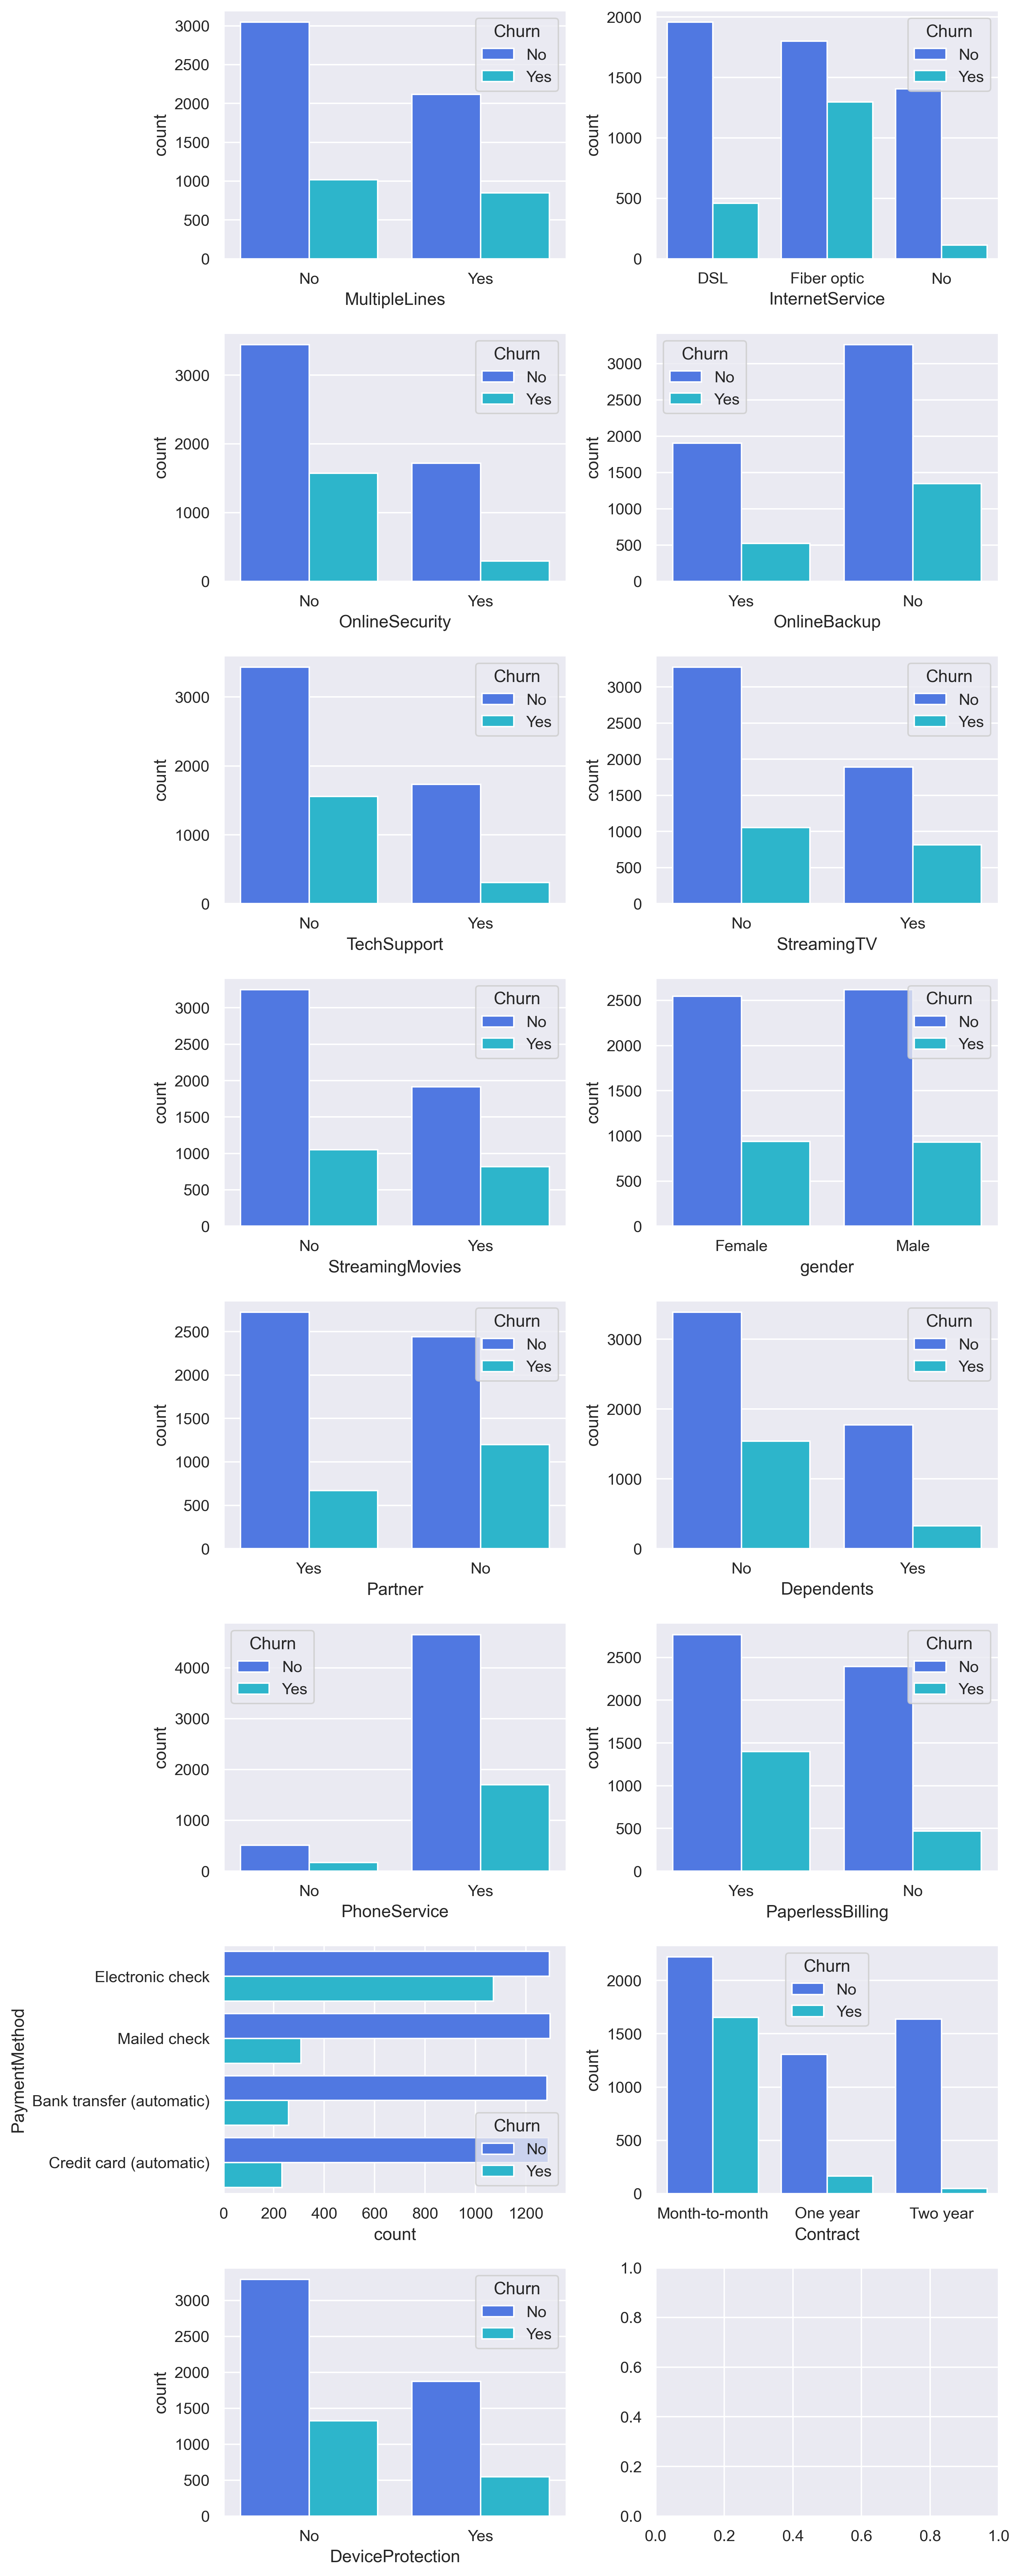

In [25]:
# Set figure size
plt.rcParams['figure.figsize']=(10,25)

# Create subplots
fig,index=plt.subplots(8,2)

#Create count plot chategorical column with respect to churn
sns.countplot(data=df,x=df['MultipleLines'],hue=df['Churn'],ax=index[0,0])
sns.countplot(data=df,x=df['InternetService'],hue=df['Churn'],ax=index[0,1])
sns.countplot(data=df,x=df['OnlineSecurity'],hue=df['Churn'],ax=index[1,0])
sns.countplot(data=df,x=df['OnlineBackup'],hue=df['Churn'],ax=index[1,1])
sns.countplot(data=df,x=df['TechSupport'],hue=df['Churn'],ax=index[2,0])
sns.countplot(data=df,x=df['StreamingTV'],hue=df['Churn'],ax=index[2,1])
sns.countplot(data=df,x=df['StreamingMovies'],hue=df['Churn'],ax=index[3,0])
sns.countplot(data=df,x=df['gender'],hue=df['Churn'],ax=index[3,1])
sns.countplot(data=df,x=df['Partner'],hue=df['Churn'],ax=index[4,0])
sns.countplot(data=df,x=df['Dependents'],hue=df['Churn'],ax=index[4,1])
sns.countplot(data=df,x=df['PhoneService'],hue=df['Churn'],ax=index[5,0])
sns.countplot(data=df,x=df['PaperlessBilling'],hue=df['Churn'],ax=index[5,1])
sns.countplot(data=df,y=df['PaymentMethod'],hue=df['Churn'],ax=index[6,0])
sns.countplot(data=df,x=df['Contract'],hue=df['Churn'],ax=index[6,1])
sns.countplot(data=df,x=df['DeviceProtection'],hue=df['Churn'],ax=index[7,0])
plt.tight_layout()

 **1.count of churn or not of customer with male and female is nearlly equal so gender not important to predict churn**
    
 **2.if contract is month-to-month then their is more chance of churn of customer**

 **3.if payment method is electronic check then aslo more customer going to churn**

## Encoding

In [26]:
# Create an instance of LabelEncoder
le = LabelEncoder()

# Encode the 'Churn' column of the DataFrame
df['Churn'] = le.fit_transform(df['Churn'])

In [27]:
#select list of object column
obj_col=df.select_dtypes('object').columns

In [28]:
obj_col

Index(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'gender', 'Partner', 'Dependents', 'PhoneService', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [29]:
#Object column which have more than two unique value
colm=['Contract','PaymentMethod','InternetService']

In [30]:
# Separate features (x) and target variable (y)
x=df.drop(columns={'Churn'})
y=df['Churn']

In [31]:
# List of columns to apply get dummies
x=pd.get_dummies(x,columns=colm)
x

MultipleLines OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0               No             No          Yes               No          No   
1               No            Yes           No              Yes          No   
2               No            Yes          Yes               No          No   
3               No            Yes           No              Yes         Yes   
4               No             No           No               No          No   
...            ...            ...          ...              ...         ...   
7038           Yes            Yes           No              Yes         Yes   
7039           Yes             No          Yes              Yes          No   
7040            No            Yes           No               No          No   
7041           Yes             No           No               No          No   
7042            No            Yes           No              Yes         Yes   

     StreamingTV StreamingMovies  gender  SeniorCitizen Partner  ...  \
0             No              No  Female              0     Yes  ...   
1             No              No    Male              0      No  ...   
2             No              No    Male              0      No  ...   
3             No              No    Male              0      No  ...   
4             No              No  Female              0      No  ...   
...          ...             ...     ...            ...     ...  ...   
7038         Yes             Yes    Male              0     Yes  ...   
7039         Yes             Yes  Female              0     Yes  ...   
7040          No              No  Female              0     Yes  ...   
7041          No              No    Male              1     Yes  ...   
7042         Yes             Yes    Male              0      No  ...   

     Contract_Month-to-month  Contract_One year Contract_Two year  \
0                          1                  0                 0   
1                          0                  1                 0   
2                          1                  0                 0   
3                          0                  1                 0   
4                          1                  0                 0   
...                      ...                ...               ...   
7038                       0                  1                 0   
7039                       0                  1                 0   
7040                       1                  0                 0   
7041                       1                  0                 0   
7042                       0                  0                 1   

     PaymentMethod_Bank transfer (automatic)  \
0                                          0   
1                                          0   
2                                          0   
3                                          1   
4                                          0   
...                                      ...   
7038                                       0   
7039                                       0   
7040                                       0   
7041                                       0   
7042                                       1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                         0                               1   
1                                         0                               0   
2                                         0                               0   
3                                         0                               0   
4                                         0                               1   
...                                     ...                             ...   
7038                                      0                               0   
7039                                      1                               0   
7040                                      0                               

In [32]:
# This code drops the specified column from the obj_col DataFrame.

obj_oe=obj_col.drop(colm)

In [33]:
obj_oe

Index(['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'gender', 'Partner',
       'Dependents', 'PhoneService', 'PaperlessBilling'],
      dtype='object')

In [34]:
# Iterate over columns in obj_oe
for column in obj_oe:
    # Check if the column is 'gender'
    if column == 'gender':
        # Map 'Female' to 1 and 'Male' to 0
        x[column] = x[column].map({'Female': 1, 'Male': 0})
    else:
        # Map 'Yes' to 1 and 'No' to 0 for other columns
        x[column] = x[column].map({'Yes': 1, 'No': 0})

# Return the modified DataFrame x
x

MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                 0               0             1                 0   
1                 0               1             0                 1   
2                 0               1             1                 0   
3                 0               1             0                 1   
4                 0               0             0                 0   
...             ...             ...           ...               ...   
7038              1               1             0                 1   
7039              1               0             1                 1   
7040              0               1             0                 0   
7041              1               0             0                 0   
7042              0               1             0                 1   

      TechSupport  StreamingTV  StreamingMovies  gender  SeniorCitizen  \
0               0            0                0       1              0   
1               0            0                0       0              0   
2               0            0                0       0              0   
3               1            0                0       0              0   
4               0            0                0       1              0   
...           ...          ...              ...     ...            ...   
7038            1            1                1       0              0   
7039            0            1                1       1              0   
7040            0            0                0       1              0   
7041            0            0                0       0              1   
7042            1            1                1       0              0   

      Partner  ...  Contract_Month-to-month  Contract_One year  \
0           1  ...                        1                  0   
1           0  ...                        0                  1   
2           0  ...                        1                  0   
3           0  ...                        0                  1   
4           0  ...                        1                  0   
...       ...  ...                      ...                ...   
7038        1  ...                        0                  1   
7039        1  ...                        0                  1   
7040        1  ...                        1                  0   
7041        1  ...                        1                  0   
7042        0  ...                        0                  0   

      Contract_Two year  PaymentMethod_Bank transfer (automatic)  \
0                     0                                        0   
1                     0                                        0   
2                     0                                        0   
3                     0                                        1   
4                     0                                        0   
...                 ...                                      ...   
7038                  0                                        0   
7039                  0                                        0   
7040                  0                                        0   
7041                  0                                        0   
7042                  1                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                         0                               1   
1                                         0                               0   
2                                         0                               0   
3                                         0                               0   
4                                         0                               1   
...                                     ...                             ...   
7038                                      0                               0   
7039                  

In [35]:
x.shape

(7032, 26)

In [36]:
df_final=pd.concat([x,y],axis=1)

Text(0.5, 1.0, 'Correlation Matrix')

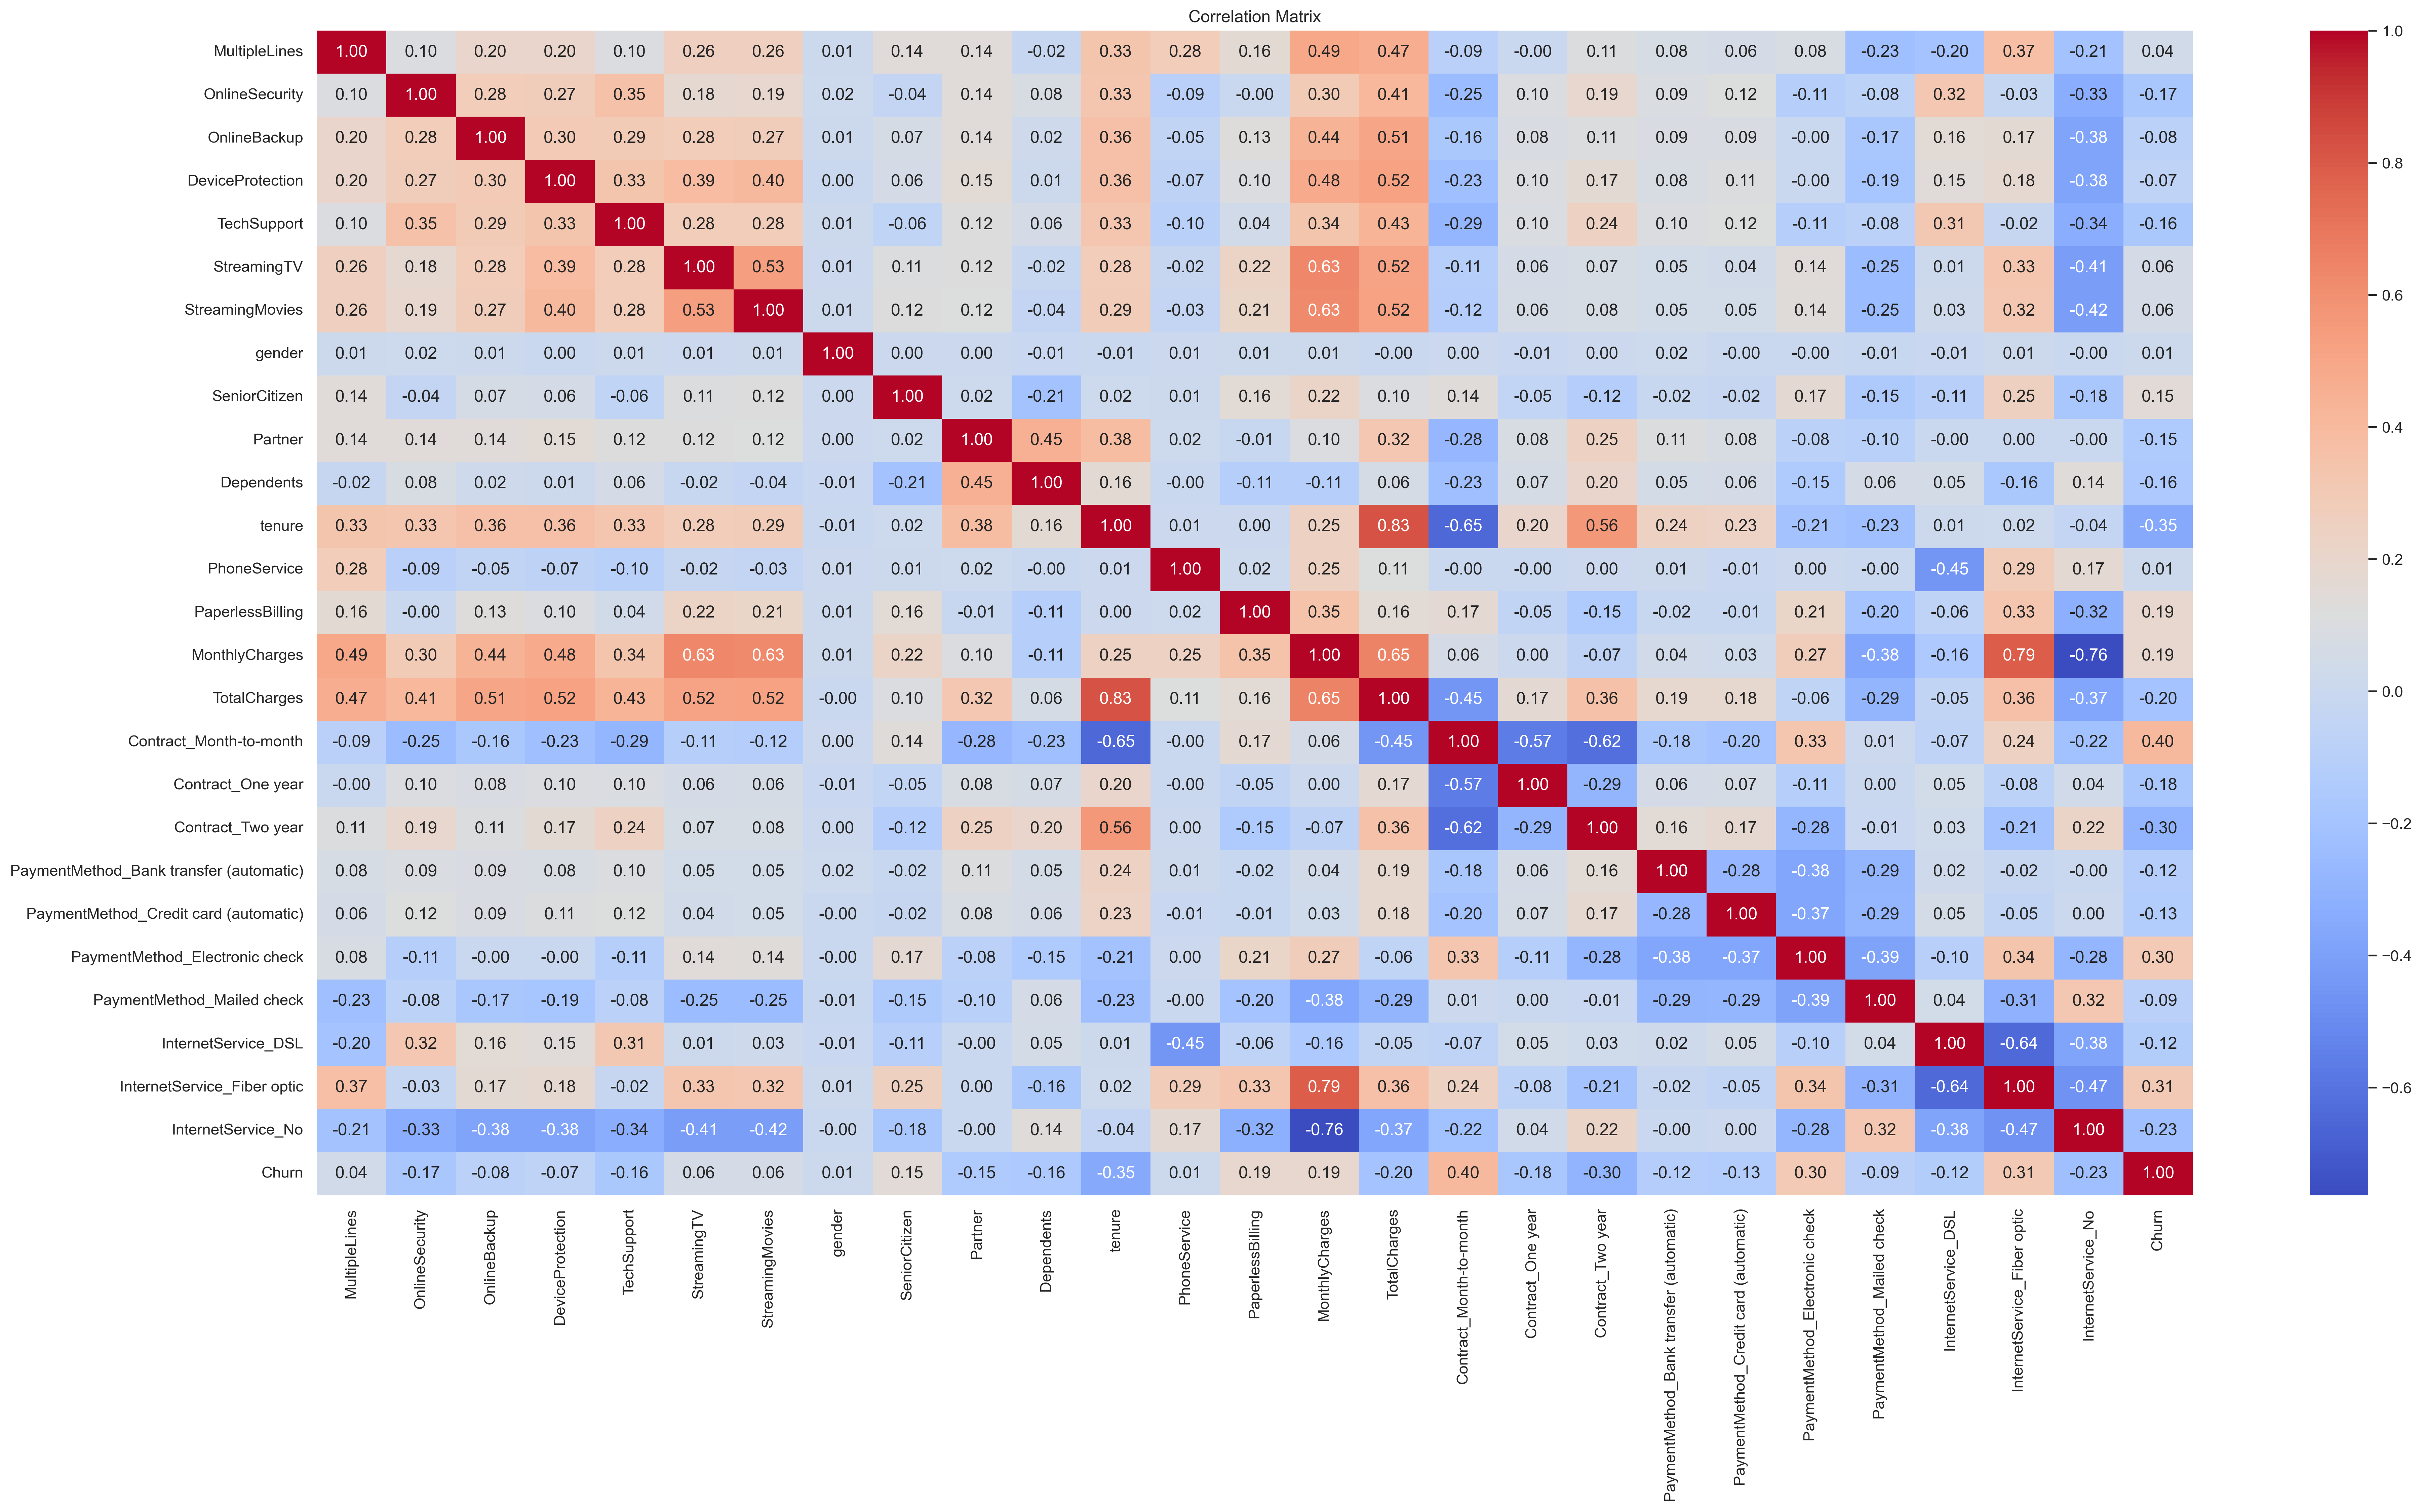

In [37]:
#Plot a heatmap for correlation of data frame

plt.figure(figsize=(30,15),dpi=300)
sns.heatmap(df_final.corr(),annot=True,fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')


## MODEL BUILDING

-- **machine learning model to predict customer churn in a telecom company, the recall value is an important metric 
to consider. Recall, also known as sensitivity or true positive rate,measures the model's ability to correctly identify 
positive instances (in this case, customers who are likely to churn) 
from the total actual positive instances.**

Here's why recall is important in this scenario:

**1.Identifying potential churners:** Telecom companies are concerned about identifying customers who are likely to churn
     so that they can take proactive measures to retain them. Recall helps in capturing as many actual churn cases as
     possible. A high recall value implies that the model is successful in identifying a large portion of customers who 
     are likely to churn, reducing the chances of false negatives (missed churn cases).

**2.Cost of false negatives:** False negatives occur when the model predicts a customer will not churn(-ve) when they
    actually do churn (positive). This can be costly for telecom companies as they may lose valuable customers without
    taking any preventive actions. By optimizing for higher recall, the model can minimize false negatives and ensure that
    as few actual churners as possible are missed.

**3.Trade-off with precision:** Recall and precision are often inversely related. Precision measures the proportion of         true positive predictions among all positive predictions made by the model. It focuses on the accuracy of positive         predictions rather than capturing all actual positives. 
    In the context of customer churn, precision represents the percentage of correctly identified churners among all           predicted churners. While precision is important, a balance needs to be struck with recall.
    Maximizing recall may result in more false positives (customers predicted to churn but who actually don't), 
    but it ensures that a significant number of true churners are not overlooked.

                                                                       
Overall, recall is important in customer churn prediction models because it helps capture as many true churners as
possible, minimizing the chances of missing valuable customers who are likely to churn. By achieving a high recall value, 
telecom companies can take proactive steps to retain those customers and mitigate revenue loss.

In [38]:
# Import necessary modules

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import classification_report,confusion_matrix,recall_score,f1_score
from sklearn.preprocessing import StandardScaler


In [186]:
# Splitting the data into training and testing sets
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.25,random_state=2)

In [40]:
#Builds a model using the given data and evaluates its performance.

def model_building(mod,x,y):
    
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.25,random_state=2,stratify=y)
    model=mod.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    
    print(classification_report(ytest,ypred))
    print('confusion matrix: ')
    print(confusion_matrix(ytest,ypred))
    print('trainning accuracy:',model.score(xtrain,ytrain),'testing accuracy:',model.score(xtest,ytest))
    
    return model,ytest,ypred

In [41]:
lg_model=model_building(LogisticRegression(),x,y)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3872
           1       0.66      0.54      0.59      1402

    accuracy                           0.80      5274
   macro avg       0.75      0.72      0.73      5274
weighted avg       0.79      0.80      0.80      5274

confusion matrix: 
[[3476  396]
 [ 645  757]]
trainning accuracy: 0.8043230944254836 testing accuracy: 0.8026166097838453


In [42]:
#Calculate the recall score for a logistic regression model.
lg_recall=recall_score(lg_model[1],lg_model[2])
lg_recall

0.5399429386590585

In [44]:
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score
from sklearn.preprocessing import binarize

In [181]:
xtrain,xtest,ytrain,ytest=train_test_split(x_imp_st,y_sm,train_size=0.25,random_state=2)

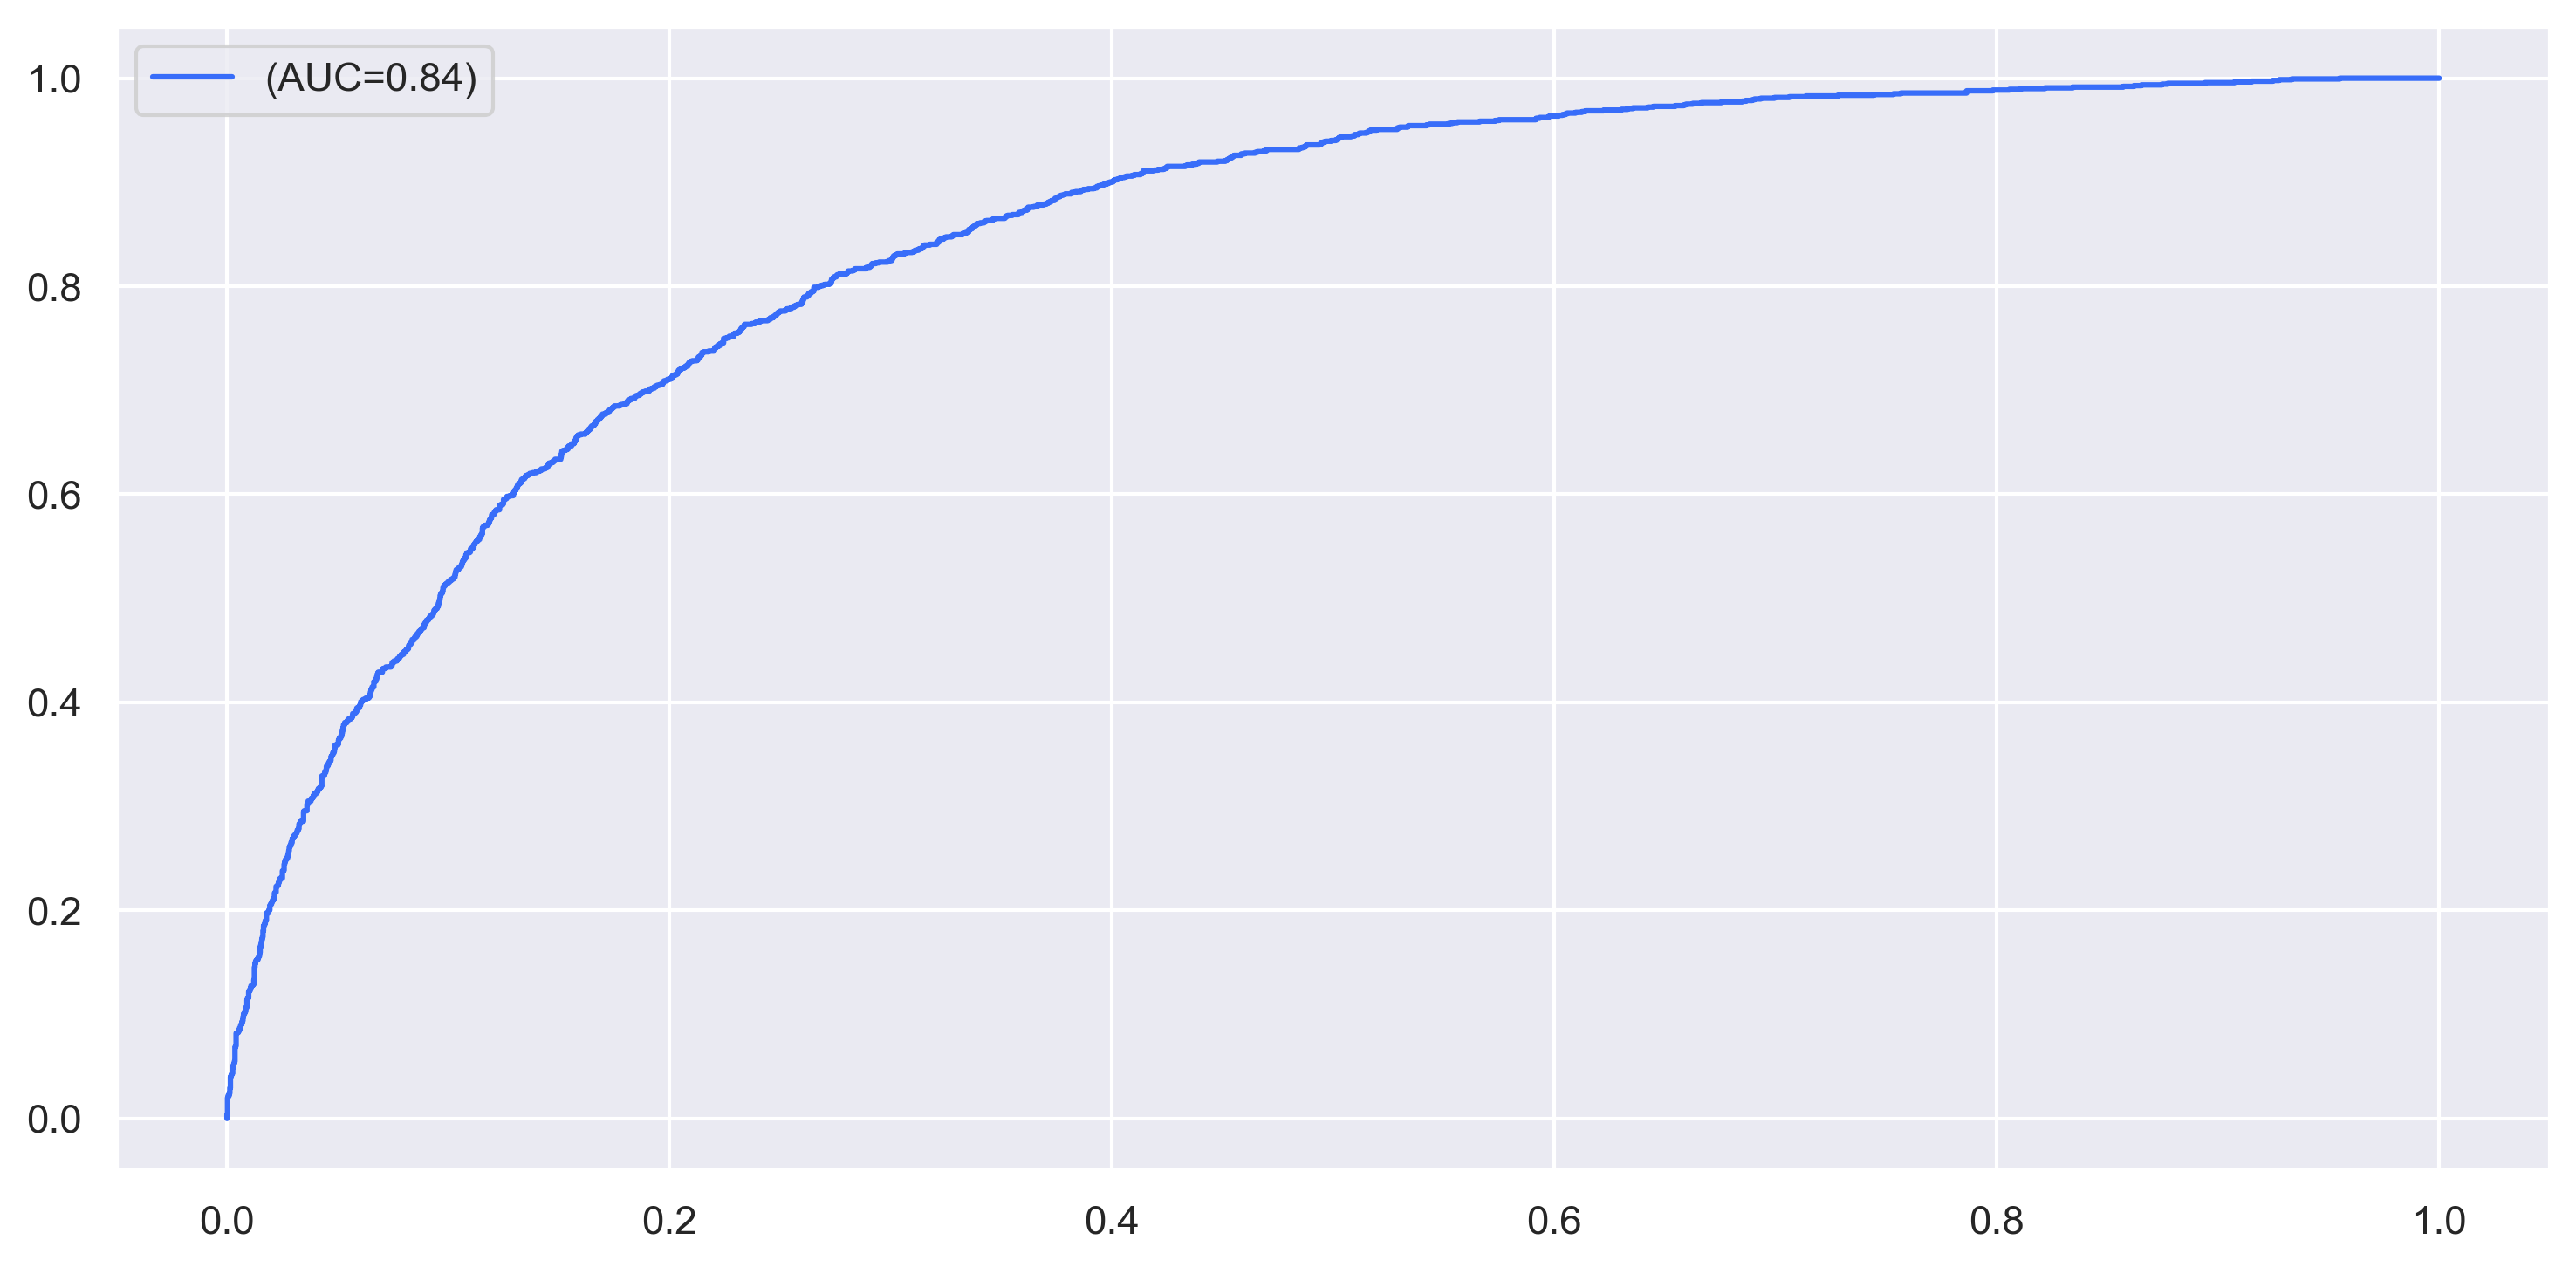

In [187]:
lg=LogisticRegression()
model=lg.fit(xtrain,ytrain)

proba=model.predict_proba(xtest)[:,1]

#fpr : List of false positive rates.
#tpr : List of true positive rates.
#auc : Area under the ROC curve.
auc=roc_auc_score(ytest,proba)

fpr,tpr,thresh=roc_curve(ytest,proba)

plt.rcParams['figure.figsize'] = (10,5)
plt.plot(fpr,tpr,label='(AUC=%0.2f)'%auc)
plt.legend()
plt.tight_layout()


In [188]:
accuracy=[]
for i in thresh:
    ypred=np.where(proba>i,1,0)
    accuracy.append(accuracy_score(ytest,ypred))

final_threshod=pd.DataFrame({
    'thresh':thresh,
    'accuracy':accuracy
})

final_threshod.sort_values(by='accuracy',ascending=False)

thresh  accuracy
582   0.464235  0.800341
598   0.453839  0.800341
587   0.459715  0.800341
563   0.471265  0.800152
590   0.459071  0.800152
...        ...       ...
1477  0.005000  0.314752
1478  0.004997  0.314562
1479  0.003726  0.299014
1480  0.003726  0.298824
1481  0.001095  0.266212

[1482 rows x 2 columns]

In [190]:
ypred=binarize([proba],threshold=0.453839)[0]

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      3871
           1       0.63      0.60      0.61      1403

    accuracy                           0.80      5274
   macro avg       0.74      0.74      0.74      5274
weighted avg       0.80      0.80      0.80      5274



In [191]:
print(confusion_matrix(ytest,ypred))

[[3387  484]
 [ 568  835]]


In [192]:
lg1_recall=recall_score(ytest,ypred)
lg1_recall

0.5951532430506058

In [55]:
# Create an instance of StandardScaler
sc=StandardScaler()
# Fit and transform the input data
x1=sc.fit_transform(x)
# Print the transformed data
x1

array([[-0.85433559, -0.63374636,  1.37833008, ...,  1.38224311,
        -0.88689648, -0.52513044],
       [-0.85433559,  1.57791834, -0.72551562, ...,  1.38224311,
        -0.88689648, -0.52513044],
       [-0.85433559,  1.57791834,  1.37833008, ...,  1.38224311,
        -0.88689648, -0.52513044],
       ...,
       [-0.85433559,  1.57791834, -0.72551562, ...,  1.38224311,
        -0.88689648, -0.52513044],
       [ 1.17050023, -0.63374636, -0.72551562, ..., -0.72346173,
         1.12752731, -0.52513044],
       [-0.85433559,  1.57791834, -0.72551562, ..., -0.72346173,
         1.12752731, -0.52513044]])

In [56]:
from sklearn.decomposition import PCA

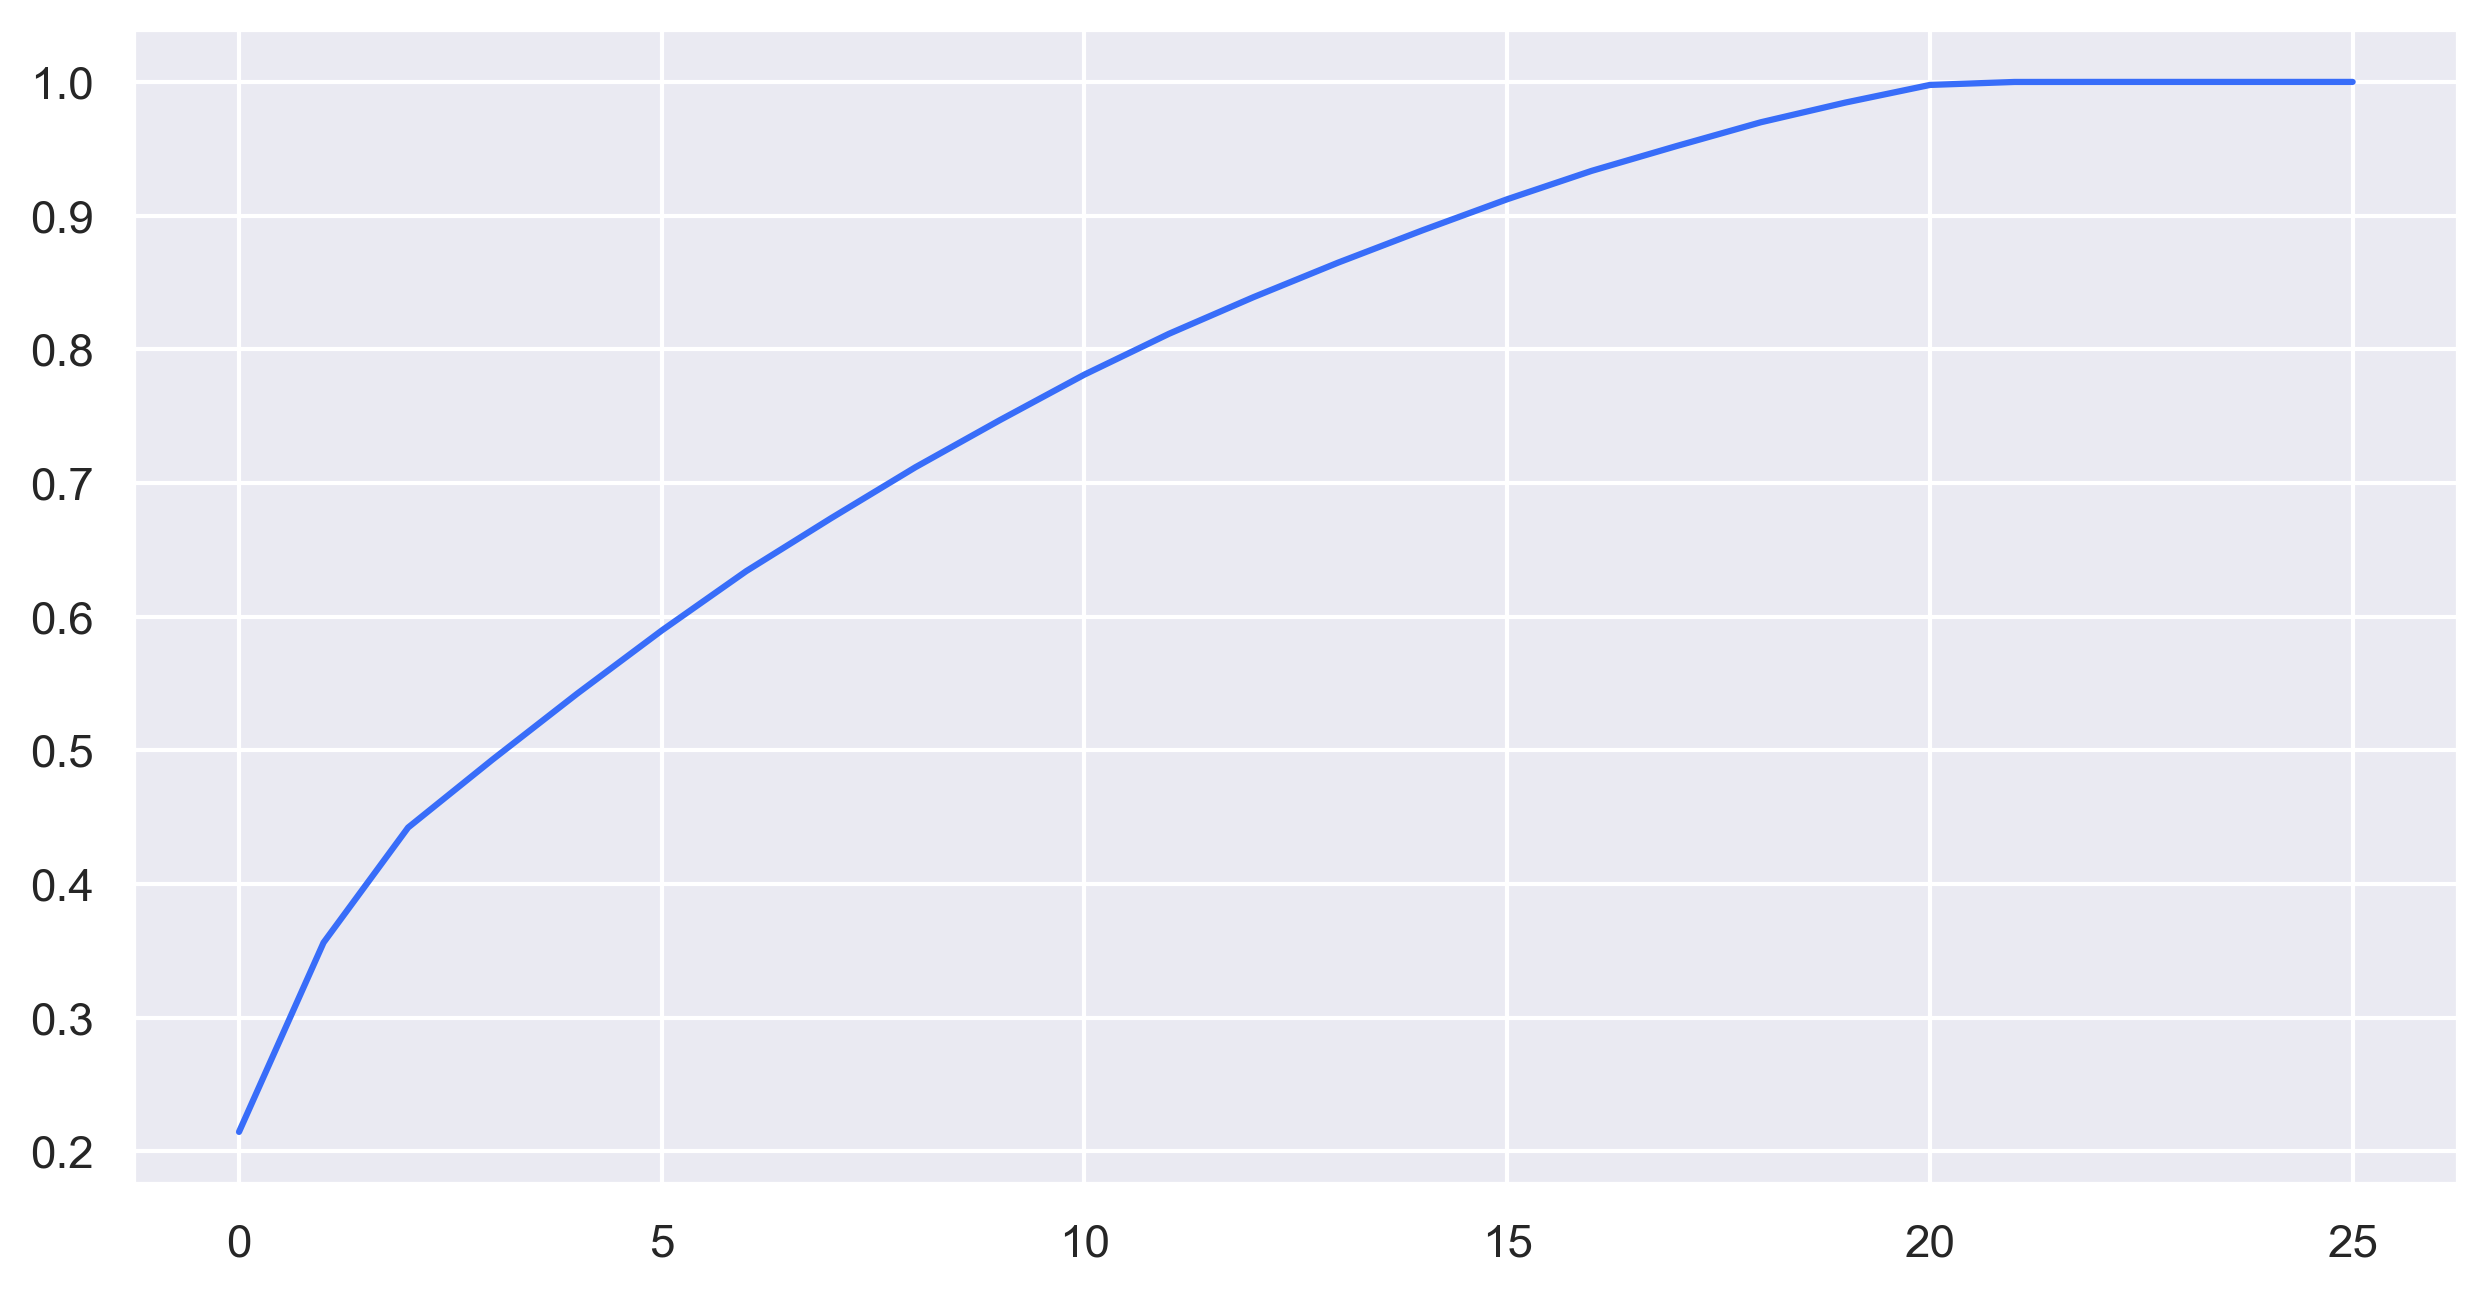

In [57]:
# Perform Principal Component Analysis (PCA)
pca=PCA()
pcs=pca.fit_transform(x1)

# Plot the cumulative sum of explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [58]:
# Create an instance of PCA with 15 components
pca=PCA(n_components=15)
pcs=pca.fit_transform(x)
x1=pd.DataFrame(pcs)
x1

0          1          2         3         4         5   \
0    -2253.859272  -8.887308 -16.939617  0.517675  0.862266  1.248573   
1     -393.823813  -6.260914   2.588620  0.972271 -0.029843 -0.960662   
2    -2175.349016  11.886976  -6.386797  0.939363  0.326423 -0.314048   
3     -442.598110 -24.071871   6.572199  1.387896  0.458031 -0.749829   
4    -2131.706835  26.854692   0.564594 -0.567812  0.370728  0.027740   
...           ...        ...        ...       ...       ...       ...   
7027  -292.679864  22.764232   4.755625  1.583328 -1.156411  0.124023   
7028  5079.892785  -2.343272  -7.673557 -0.546993 -0.522377  0.264788   
7029 -1937.196519 -14.739544 -11.830357  0.690920  0.381665  1.572930   
7030 -1976.718821  28.692059   2.159226 -0.650006 -0.519378  0.017820   
7031  4561.500328   4.471172  -5.837674  0.031651  0.163696 -0.779007   

            6         7         8         9         10        11        12  \
0    -0.641665  0.074414  0.045812 -0.359995  0.140360 -0.082260 -0.116441   
1     0.721200  0.523728  0.176591  0.105764  0.777227  0.353181  0.013659   
2     0.397376 -0.608813  0.158486 -0.551168  0.380919  0.899403 -0.089670   
3     0.571791  0.446541  0.888260 -0.123836  0.289855 -0.559227 -0.083673   
4    -0.490554  0.117768 -0.065948 -0.034741  0.147032  0.084321 -0.293454   
...        ...       ...       ...       ...       ...       ...       ...   
7027  0.644135  0.655208  0.064994  0.034037 -0.302738  0.801085  1.087805   
7028 -0.338258  0.898452 -0.571544 -0.671997 -0.224549  0.028000 -0.158967   
7029 -0.645346 -0.015909 -0.008194 -0.283135  0.275002 -0.022440  0.036699   
7030  0.419127 -0.521491  0.096302 -0.500499  0.026238  0.637825  0.428848   
7031  0.436315 -0.330126  0.542445  0.567901 -0.847977  0.061616 -0.534609   

            13        14  
0     0.077647 -0.635841  
1     0.222729  0.799724  
2     0.066419 -0.195468  
3    -0.328705  0.659131  
4    -0.651388  0.061469  
...        ...       ...  
7027  0.178382  0.527645  
7028  0.568404 -0.242125  
7029 -0.473275  0.524883  
7030  0.666804  0.426968  
7031 -0.998702  0.608618  

[7032 rows x 15 columns]

In [59]:
lg2_model=model_building(LogisticRegression(),x1,y)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3872
           1       0.66      0.51      0.58      1402

    accuracy                           0.80      5274
   macro avg       0.75      0.71      0.72      5274
weighted avg       0.79      0.80      0.79      5274

confusion matrix: 
[[3501  371]
 [ 681  721]]
trainning accuracy: 0.7992036405005688 testing accuracy: 0.8005309063329541


In [60]:
lg2_recall=recall_score(lg2_model[1],lg2_model[2])
lg2_recall

0.514265335235378

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [62]:
dt_model=model_building(DecisionTreeClassifier(),x,y)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      3872
           1       0.48      0.49      0.49      1402

    accuracy                           0.73      5274
   macro avg       0.65      0.65      0.65      5274
weighted avg       0.73      0.73      0.73      5274

confusion matrix: 
[[3136  736]
 [ 710  692]]
trainning accuracy: 0.9988623435722411 testing accuracy: 0.7258248009101251


In [63]:
dt_recall=recall_score(dt_model[1],dt_model[2])
dt_recall

0.49358059914407987

In [64]:
# Define the parameters for grid search
params = {
    'criterion' : ["gini", "entropy"],
    'splitter' : ["best", "random"],
    'max_depth' : [2,4,6],
    'min_samples_split' : [4,6,12,16],
    'max_leaf_nodes' : [8,12,18,20],
    'min_samples_leaf' : [1,3,5,10]
}

# Perform grid search using the defined parameters
grid = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), param_grid=params, cv = 5, verbose=-1)

grid.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6],
                         'max_leaf_nodes': [8, 12, 18, 20],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'min_samples_split': [4, 6, 12, 16],
                         'splitter': ['best', 'random']},
             verbose=-1)

In [65]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_leaf_nodes': 18,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'splitter': 'random'}

In [ ]:
dt1_model=DecisionTreeClassifier(criterion= 'gini',
                                 max_depth= 6,max_leaf_nodes= 18,
                                 min_samples_leaf= 1,min_samples_split= 4,
                                 splitter= 'random',class_weight='balanced',random_state=10)

dt1_model.fit(xtrain,ytrain)

ypred=dt1_model.predict(xtest)

print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

In [ ]:
dt1_recall=recall_score(ytest,ypred)
dt1_recall

## Balanced Data

**When it comes to customer churn prediction in a telecom company, the balance of the target column (churn or non-churn) is important, particularly if there is a bias in the data. Here's why:**

**1.Model performance:** Imbalanced data can lead to biased model performance. If the majority class (non-churn) heavily          dominates the dataset, a model trained on such data may become excessively biased towards predicting the majority          class. As a result, the model's ability to identify the minority class (churn) accurately may be compromised.              Balancing the target column helps ensure that the model is exposed to an adequate number of churn instances,              enabling it to learn patterns and make better predictions for both classes.

**2.Accurate churn prediction:** The primary goal of a churn prediction model is to identify customers who are likely to        churn. In an imbalanced dataset, a model that is biased towards the majority class may incorrectly classify churners      as non-churners, leading to missed opportunities for intervention. By balancing the target column, you provide equal      representation to churners, allowing the model to learn from both classes and improve its ability to accurately            predict churn.

**3.Decision-making and resource allocation:** Telecom companie rely on churn prediction models to make informed decisions        and allocate resources effectively. If the model is biased towards the majority class, it may lead to misallocation        of resources. For instance, the company might end up targeting non-churners with retention efforts, while actual          churners are left unnoticed. Balancing the target column helps in achieving a more accurate prediction of churn,          enabling the company to allocate resources efficiently and focus on customers who are genuinely at risk of                churning.

**4.Evaluation metrics:** Balanced data is crucial for reliable evaluation of model performance. Common evaluation metrics        like accuracy can be misleading in the presence of class imbalance. For example, if the non-churn class constitutes        90% of the data, a model that simply predicts non-churn for all instances will achieve 90% accuracy. However, this        model fails to capture any churn cases. By balancing the target column, you can evaluate the model using more              appropriate metrics like precision, recall, F1-score, or area under the ROC curve (AUC-ROC) that account for class        imbalance and provide a more comprehensive assessment.

**In summary, balancing the target column is essential in classification problems, especially when predicting customer churn in a telecom company. It helps address bias in the data, improves model performance, facilitates accurate churn prediction, aids decision-making and resource allocation, and enables reliable evaluation of the model's effectiveness.**

### Ovresampling

In [68]:
count_churn=df_final[(df_final['Churn'])==1]

count_Not_churn=df_final[(df_final['Churn'])==0]

In [69]:
count_churn.shape,count_Not_churn.shape

((1869, 27), (5163, 27))

In [70]:
count_churn=count_churn.sample(5163,replace=True)

count_churn.shape

(5163, 27)

In [71]:
df_balanced=pd.concat([count_churn,count_Not_churn],axis=0)

df_balanced.shape

(10326, 27)

In [72]:
df_balanced['Churn'].value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [73]:
x_bal=df_balanced.drop(columns='Churn')

y_bal=df_balanced['Churn']

In [74]:
xtrain,xtest,ytrain,ytest=train_test_split(x_bal,y_bal,train_size=0.75,random_state=2,stratify=y_bal)

In [75]:
ytrain.value_counts(),ytest.value_counts()

(1    3872
 0    3872
 Name: Churn, dtype: int64,
 0    1291
 1    1291
 Name: Churn, dtype: int64)

In [76]:
lg3_model=model_building(LogisticRegression(),x_bal,y_bal)

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      3873
           1       0.75      0.81      0.78      3872

    accuracy                           0.77      7745
   macro avg       0.77      0.77      0.77      7745
weighted avg       0.77      0.77      0.77      7745

confusion matrix: 
[[2815 1058]
 [ 741 3131]]
trainning accuracy: 0.7570709027508717 testing accuracy: 0.7677211103938024


In [77]:
lg3_recall=recall_score(lg3_model[1],lg3_model[2])
lg3_recall

0.8086260330578512

In [78]:
proba=lg3_model[0].predict_proba(xtest)[:,1]

ypred=binarize([proba],threshold=0.453852)[0]

In [79]:
print(classification_report(ytest,ypred))

print(confusion_matrix(ytest,ypred))


              precision    recall  f1-score   support

           0       0.81      0.70      0.75      1291
           1       0.74      0.84      0.78      1291

    accuracy                           0.77      2582
   macro avg       0.77      0.77      0.77      2582
weighted avg       0.77      0.77      0.77      2582

[[ 904  387]
 [ 208 1083]]


In [80]:
lg4_recall=recall_score(ytest,ypred)
lg4_recall

0.838884585592564

## Smote

In [81]:
from imblearn.over_sampling import SMOTE

In [82]:
smote=SMOTE(sampling_strategy='minority')

x_sm,y_sm=smote.fit_resample(x,y)

In [83]:
lg5_model=model_building(LogisticRegression(),x_sm,y_sm)

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      3873
           1       0.80      0.84      0.82      3872

    accuracy                           0.82      7745
   macro avg       0.82      0.82      0.82      7745
weighted avg       0.82      0.82      0.82      7745

confusion matrix: 
[[3085  788]
 [ 621 3251]]
trainning accuracy: 0.8372723750484309 testing accuracy: 0.8180761781794706


In [84]:
lg5_recall=recall_score(lg5_model[1],lg5_model[2])
lg5_recall

0.8396177685950413

In [85]:
dt2_model=model_building(DecisionTreeClassifier(),x_sm,y_sm)

              precision    recall  f1-score   support

           0       0.77      0.78      0.78      3873
           1       0.78      0.77      0.78      3872

    accuracy                           0.78      7745
   macro avg       0.78      0.78      0.78      7745
weighted avg       0.78      0.78      0.78      7745

confusion matrix: 
[[3037  836]
 [ 886 2986]]
trainning accuracy: 0.9992251065478497 testing accuracy: 0.7776630083925113


In [86]:
dt2_recall=recall_score(dt2_model[1],dt2_model[2])
dt2_recall

0.7711776859504132

In [87]:
rf_model=model_building(RandomForestClassifier(),x_sm,y_sm)

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      3873
           1       0.83      0.83      0.83      3872

    accuracy                           0.83      7745
   macro avg       0.83      0.83      0.83      7745
weighted avg       0.83      0.83      0.83      7745

confusion matrix: 
[[3236  637]
 [ 670 3202]]
trainning accuracy: 0.9992251065478497 testing accuracy: 0.8312459651387992


In [88]:
rf_recall=recall_score(rf_model[1],rf_model[2])
rf_recall

0.8269628099173554

In [89]:
x_st=sc.fit_transform(x_sm)

In [90]:
svm_model=model_building(SVC(),x_st,y_sm)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      3873
           1       0.85      0.81      0.83      3872

    accuracy                           0.84      7745
   macro avg       0.84      0.84      0.84      7745
weighted avg       0.84      0.84      0.84      7745

confusion matrix: 
[[3328  545]
 [ 729 3143]]
trainning accuracy: 0.8690430065865944 testing accuracy: 0.8355067785668173


In [91]:
svm_recall=recall_score(svm_model[1],svm_model[2])
svm_recall

0.8117252066115702

In [92]:
knn_model=model_building(KNeighborsClassifier(),x_st,y_sm)

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      3873
           1       0.79      0.84      0.81      3872

    accuracy                           0.81      7745
   macro avg       0.81      0.81      0.81      7745
weighted avg       0.81      0.81      0.81      7745

confusion matrix: 
[[3007  866]
 [ 624 3248]]
trainning accuracy: 0.870592793490895 testing accuracy: 0.8076178179470627


In [93]:
knn_recall=recall_score(knn_model[1],knn_model[2])
knn_recall

0.8388429752066116

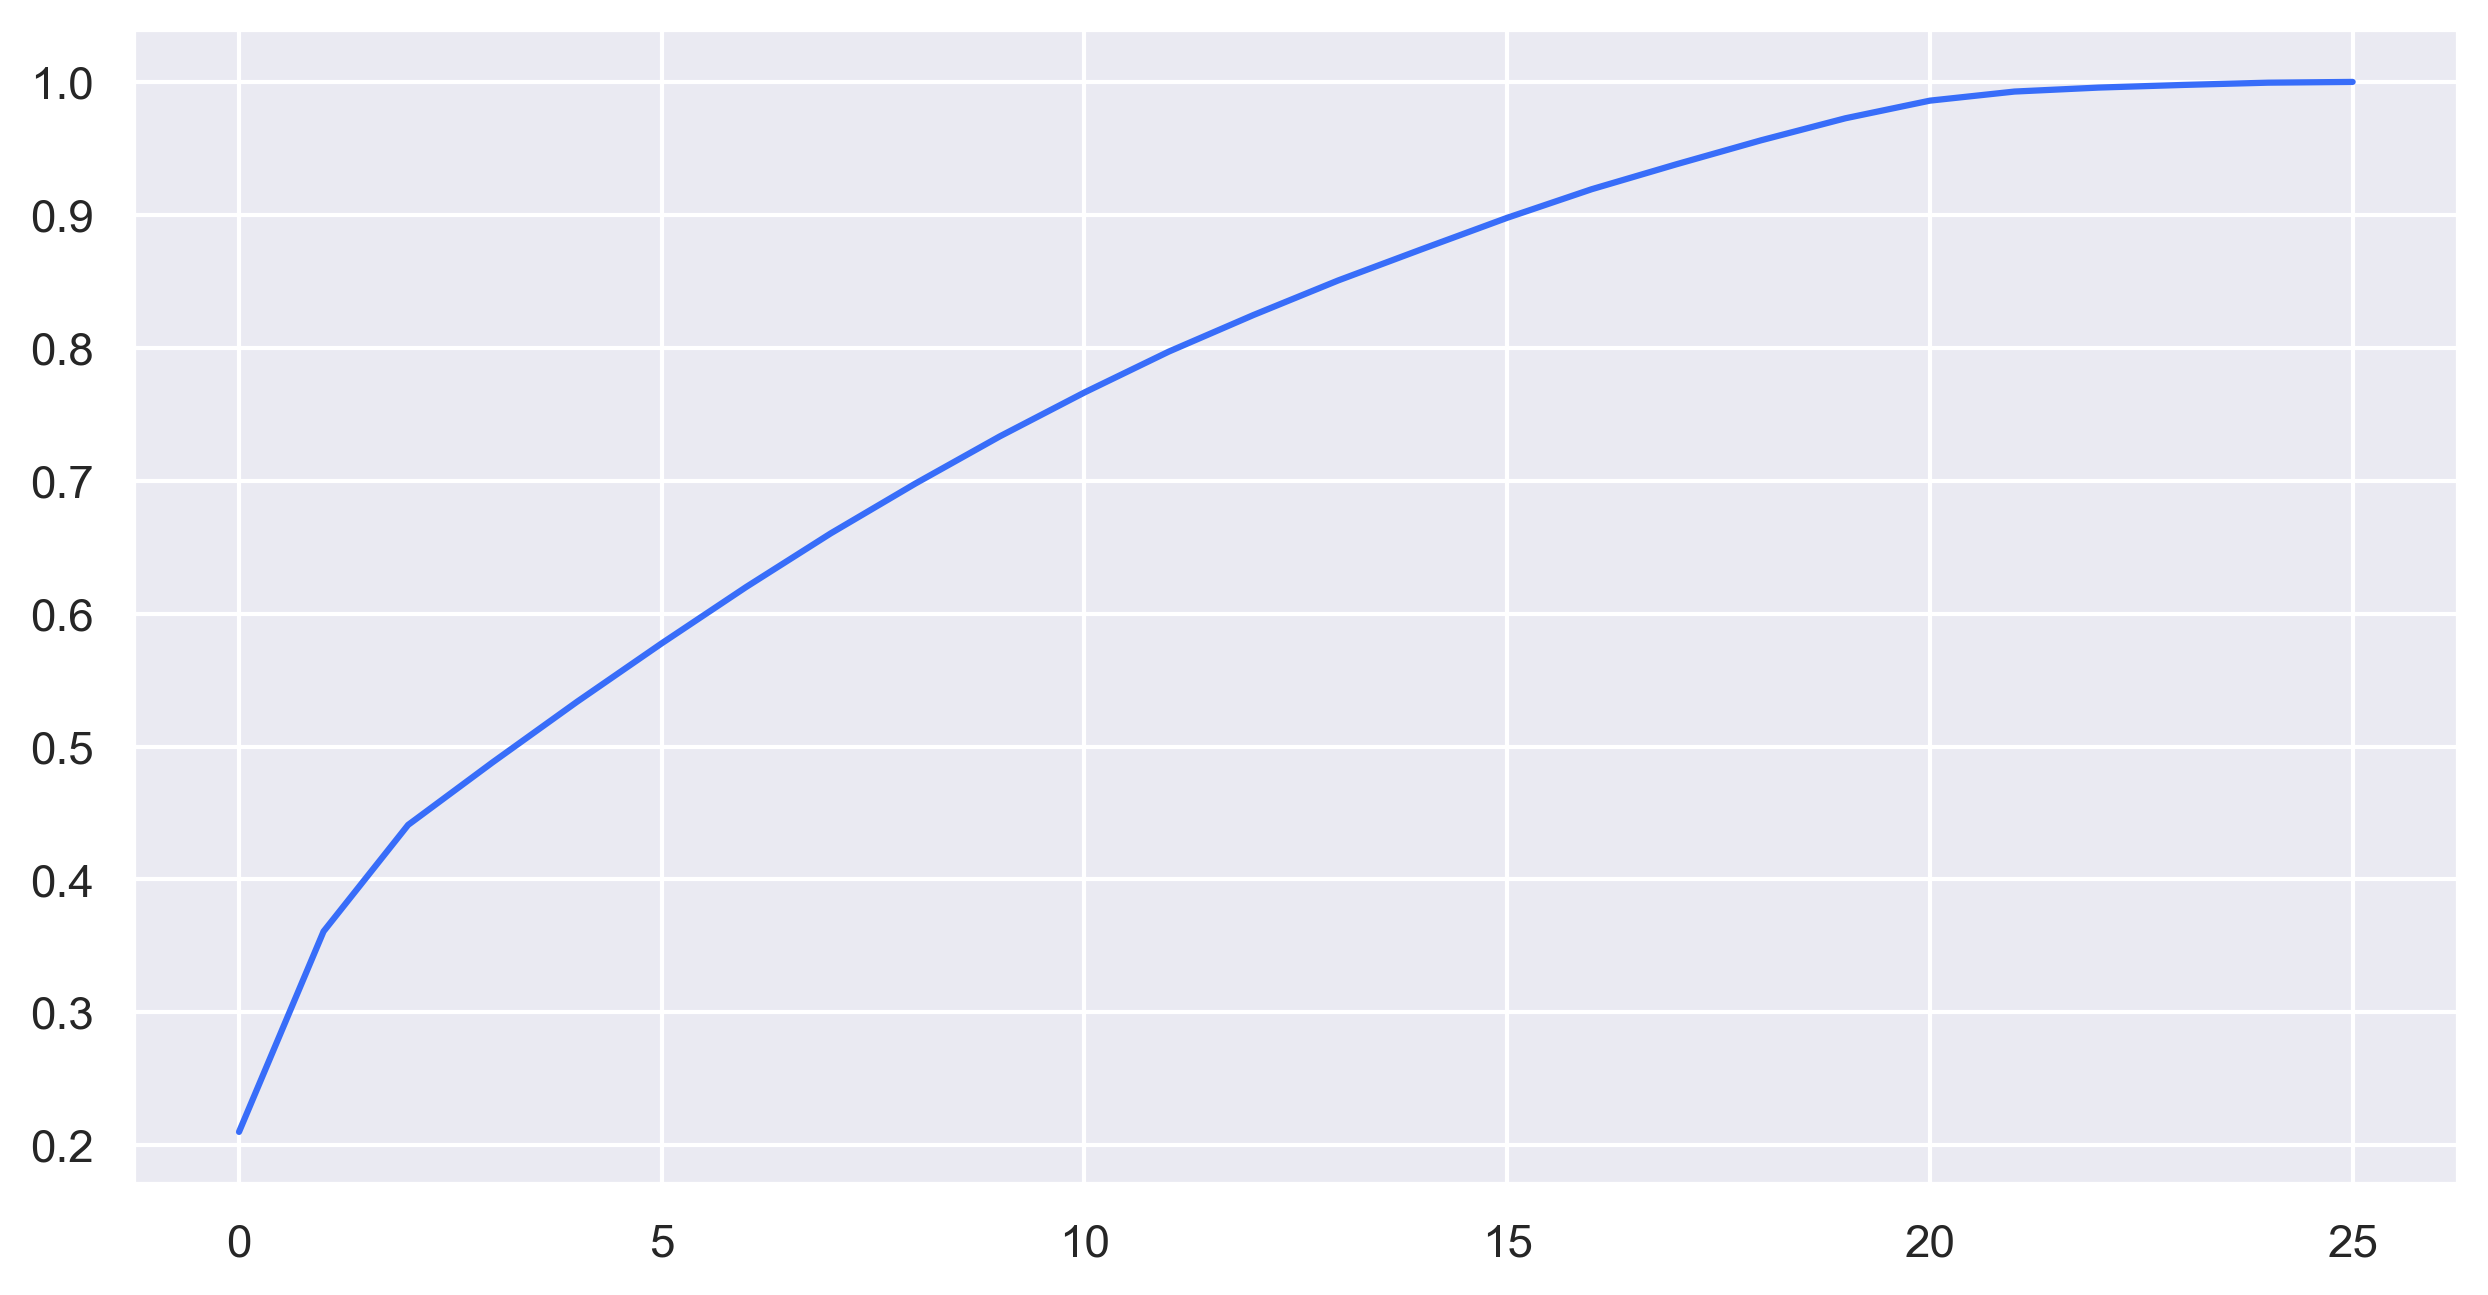

In [94]:
pca=PCA()
pcs=pca.fit_transform(x_st)
plt.plot(np.cumsum(pca.explained_variance_ratio_))


In [95]:
pca=PCA(n_components=15)
pcs=pca.fit_transform(x_st)
x_st_pca=pd.DataFrame(pcs)

In [96]:
lg4_model=model_building(LogisticRegression(),x_st_pca,y_sm)

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      3873
           1       0.78      0.83      0.81      3872

    accuracy                           0.80      7745
   macro avg       0.80      0.80      0.80      7745
weighted avg       0.80      0.80      0.80      7745

confusion matrix: 
[[2985  888]
 [ 659 3213]]
trainning accuracy: 0.7996900426191399 testing accuracy: 0.8002582311168496


In [97]:
lg4_recall=recall_score(lg4_model[1],lg4_model[2])
lg4_recall

0.8298037190082644

In [98]:
knnpca_model=model_building(KNeighborsClassifier(),x_st_pca,y_sm)

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      3873
           1       0.79      0.83      0.81      3872

    accuracy                           0.81      7745
   macro avg       0.81      0.81      0.81      7745
weighted avg       0.81      0.81      0.81      7745

confusion matrix: 
[[3027  846]
 [ 654 3218]]
trainning accuracy: 0.865943432777993 testing accuracy: 0.8063266623628147


In [99]:
knnpca_recall=recall_score(knnpca_model[1],knnpca_model[2])
knnpca_recall

0.831095041322314

In [100]:
xtrain,xtest,ytrain,ytest=train_test_split(x_st,y_sm,train_size=0.75,random_state=2)

In [101]:
ac_train=[]
ac_test=[]
for i in range(1,25):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ac_train.append(knn.score(xtrain,ytrain))
    ac_test.append(knn.score(xtest,ytest))

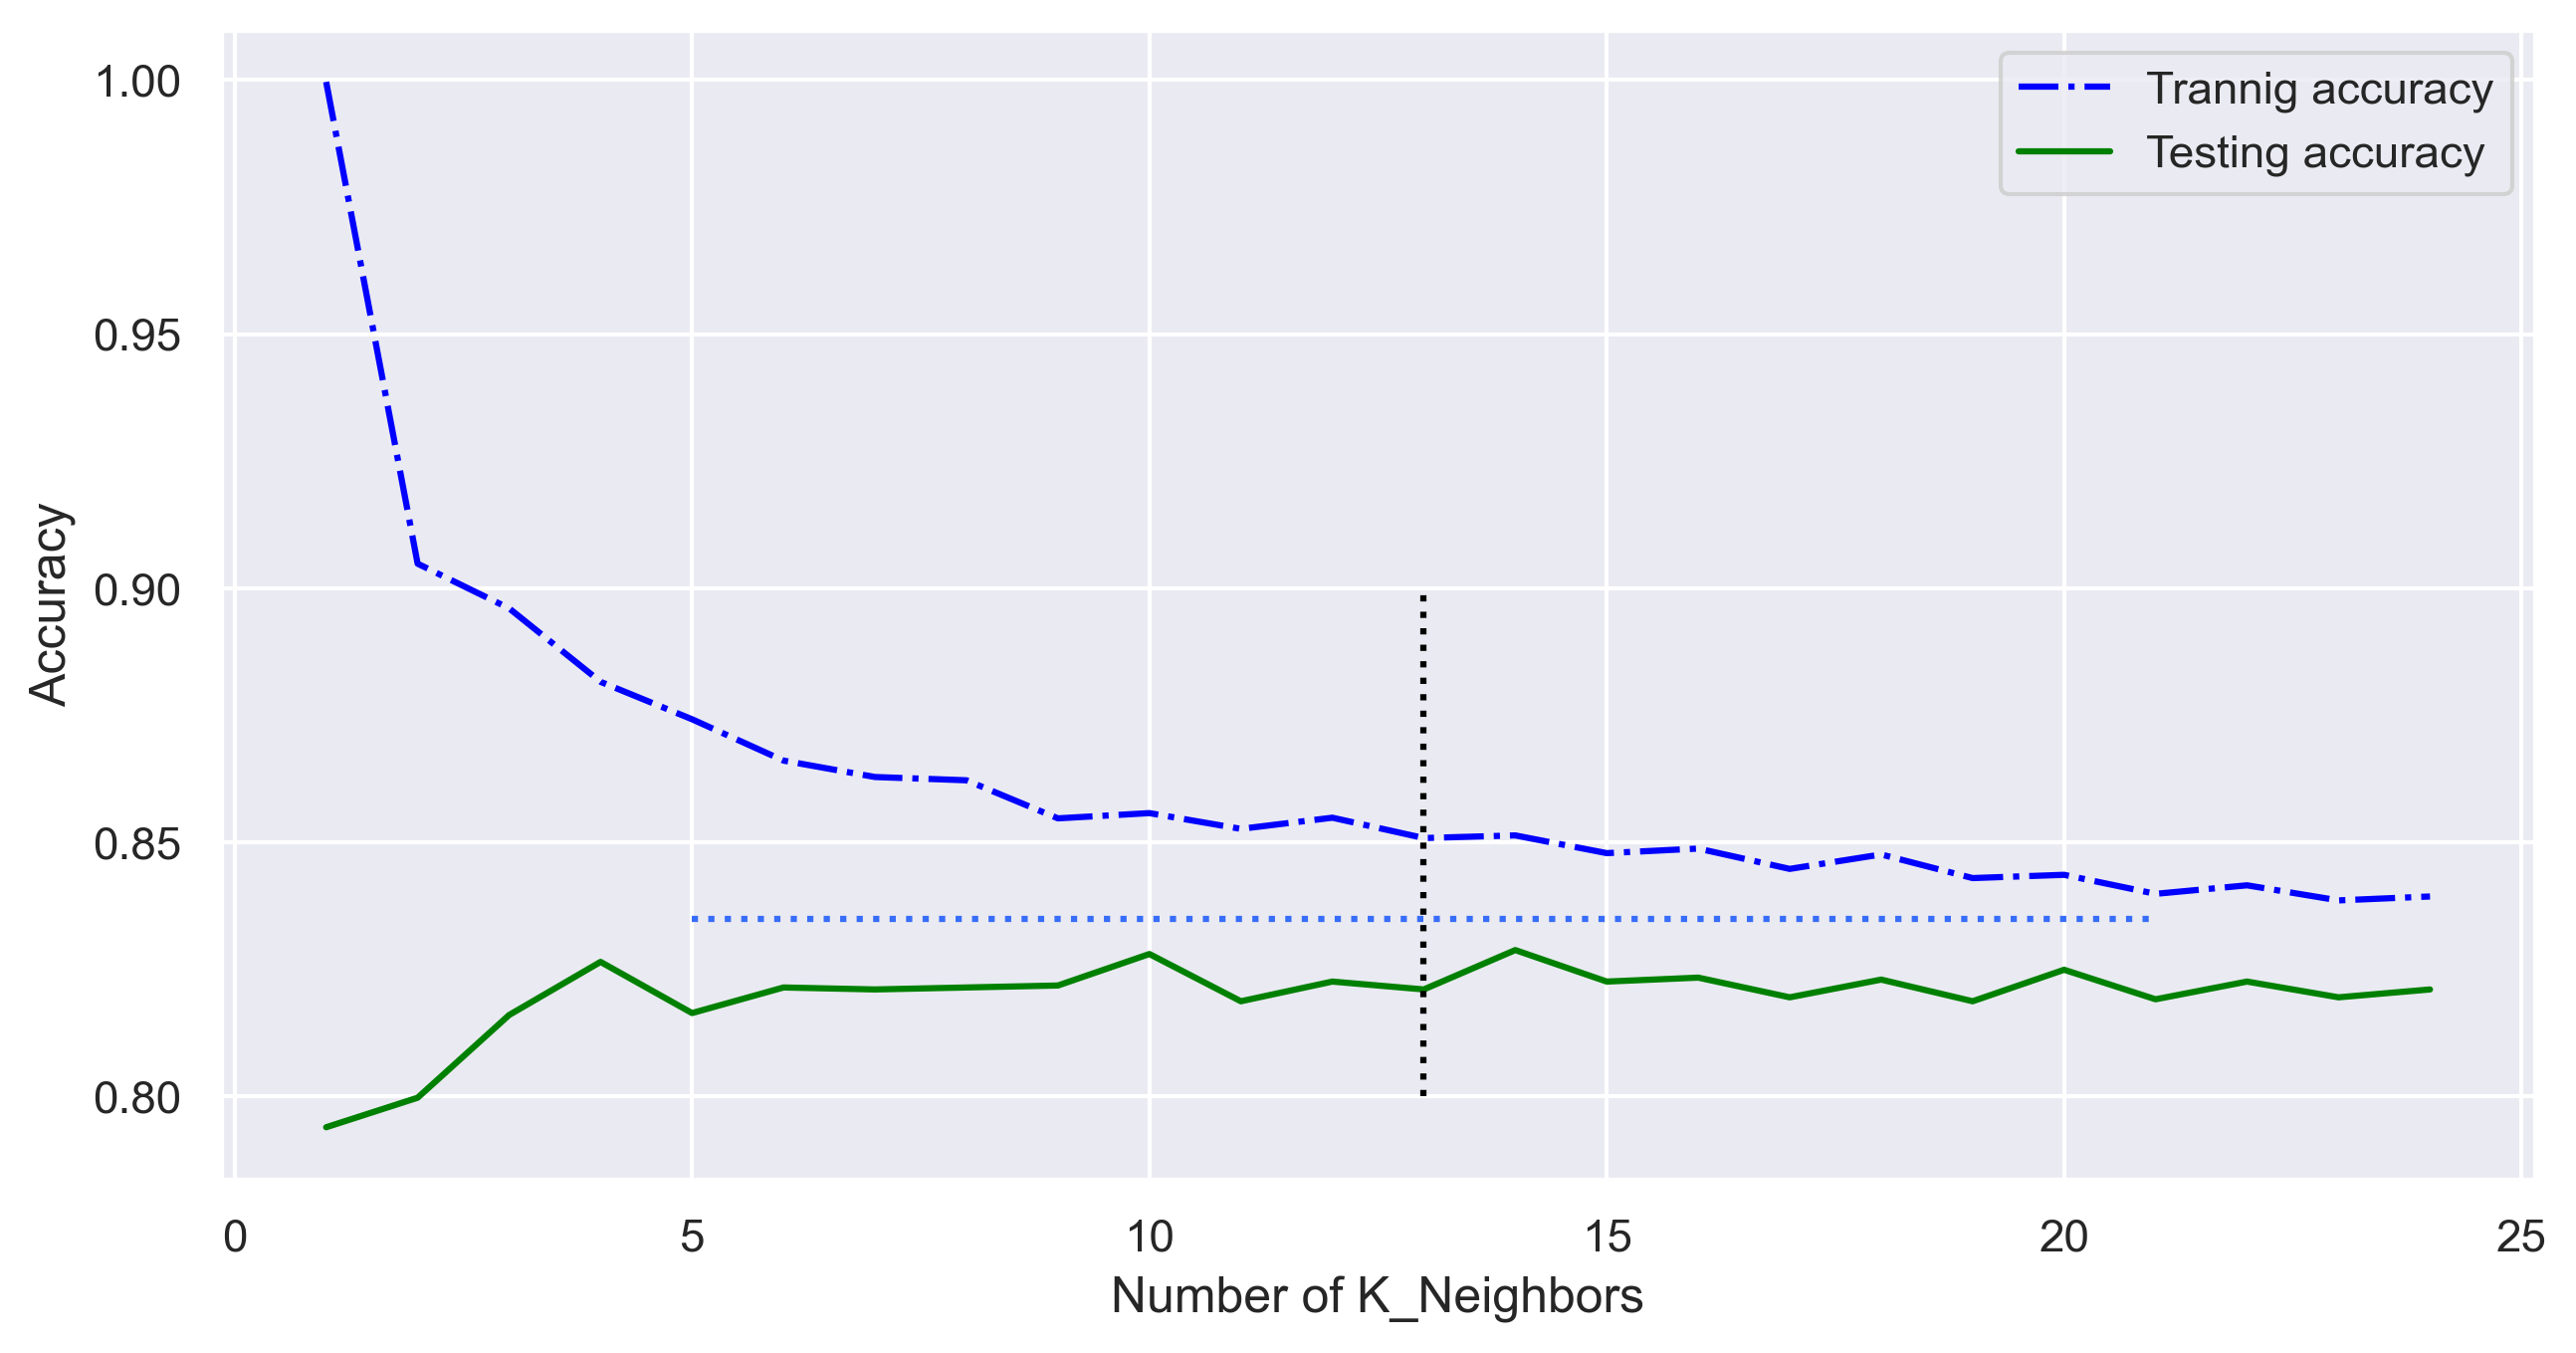

In [102]:
plt.plot(range(1,25),ac_train,color='blue',label='Trannig accuracy',linestyle='-.')
plt.plot(range(1,25),ac_test,color='green',label='Testing accuracy',)
plt.hlines(y=0.835,xmin=5,xmax=21,linestyle=':')
plt.xlabel('Number of K_Neighbors')
plt.vlines(x=13,ymin=0.80,ymax=0.90,linestyle=':',color='black')
plt.ylabel('Accuracy')
plt.legend()

In [103]:
knnpca1_model=model_building(KNeighborsClassifier(n_neighbors=13),x_st_pca,y_sm)

              precision    recall  f1-score   support

           0       0.85      0.74      0.79      3873
           1       0.77      0.87      0.82      3872

    accuracy                           0.81      7745
   macro avg       0.81      0.81      0.81      7745
weighted avg       0.81      0.81      0.81      7745

confusion matrix: 
[[2881  992]
 [ 497 3375]]
trainning accuracy: 0.8299108872530027 testing accuracy: 0.8077469335054874


In [104]:
knnpca1_recall=recall_score(knnpca1_model[1],knnpca1_model[2])
knnpca1_recall

0.8716425619834711

In [105]:
knnpca2_model=model_building(KNeighborsClassifier(n_neighbors=13),x_st,y_sm)

              precision    recall  f1-score   support

           0       0.87      0.73      0.80      3873
           1       0.77      0.89      0.83      3872

    accuracy                           0.81      7745
   macro avg       0.82      0.81      0.81      7745
weighted avg       0.82      0.81      0.81      7745

confusion matrix: 
[[2838 1035]
 [ 421 3451]]
trainning accuracy: 0.8333979077876792 testing accuracy: 0.8120077469335055


In [106]:
knnpca2_recall=recall_score(knnpca2_model[1],knnpca2_model[2])
knnpca2_recall

0.8912706611570248

In [107]:
svm1_model=model_building(SVC(),x_st_pca,y_sm)

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      3873
           1       0.83      0.81      0.82      3872

    accuracy                           0.82      7745
   macro avg       0.82      0.82      0.82      7745
weighted avg       0.82      0.82      0.82      7745

confusion matrix: 
[[3224  649]
 [ 729 3143]]
trainning accuracy: 0.856257264626114 testing accuracy: 0.8220787604906391


In [108]:
svm1_recall=recall_score(svm1_model[1],svm1_model[2])
svm1_recall

0.8117252066115702

In [109]:
xtrain,xtest,ytrain,ytest=train_test_split(x_sm,y_sm,train_size=0.75,random_state=2,stratify=y_sm)

In [110]:
grid = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), param_grid=params, cv = 5, verbose=-1)

grid.fit(xtrain,ytrain)

grid.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 5,
 'min_samples_split': 6,
 'splitter': 'random'}

In [111]:
dt3_model=DecisionTreeClassifier(criterion= 'gini',
                                 max_depth= 6,
                                 max_leaf_nodes= 20, 
                                 min_samples_leaf= 5,
                                 min_samples_split= 12,
                                 splitter= 'random', 
                                 class_weight='balanced',
                                 random_state=10)

dt3_model=dt3_model.fit(xtrain,ytrain)

ypred=dt3_model.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1291
           1       0.82      0.80      0.81      1291

    accuracy                           0.81      2582
   macro avg       0.81      0.81      0.81      2582
weighted avg       0.81      0.81      0.81      2582



In [112]:
dt3_recall=recall_score(ytest,ypred)
dt3_recall

0.8024786986831913

<AxesSubplot:xlabel='Feature imp', ylabel='column'>

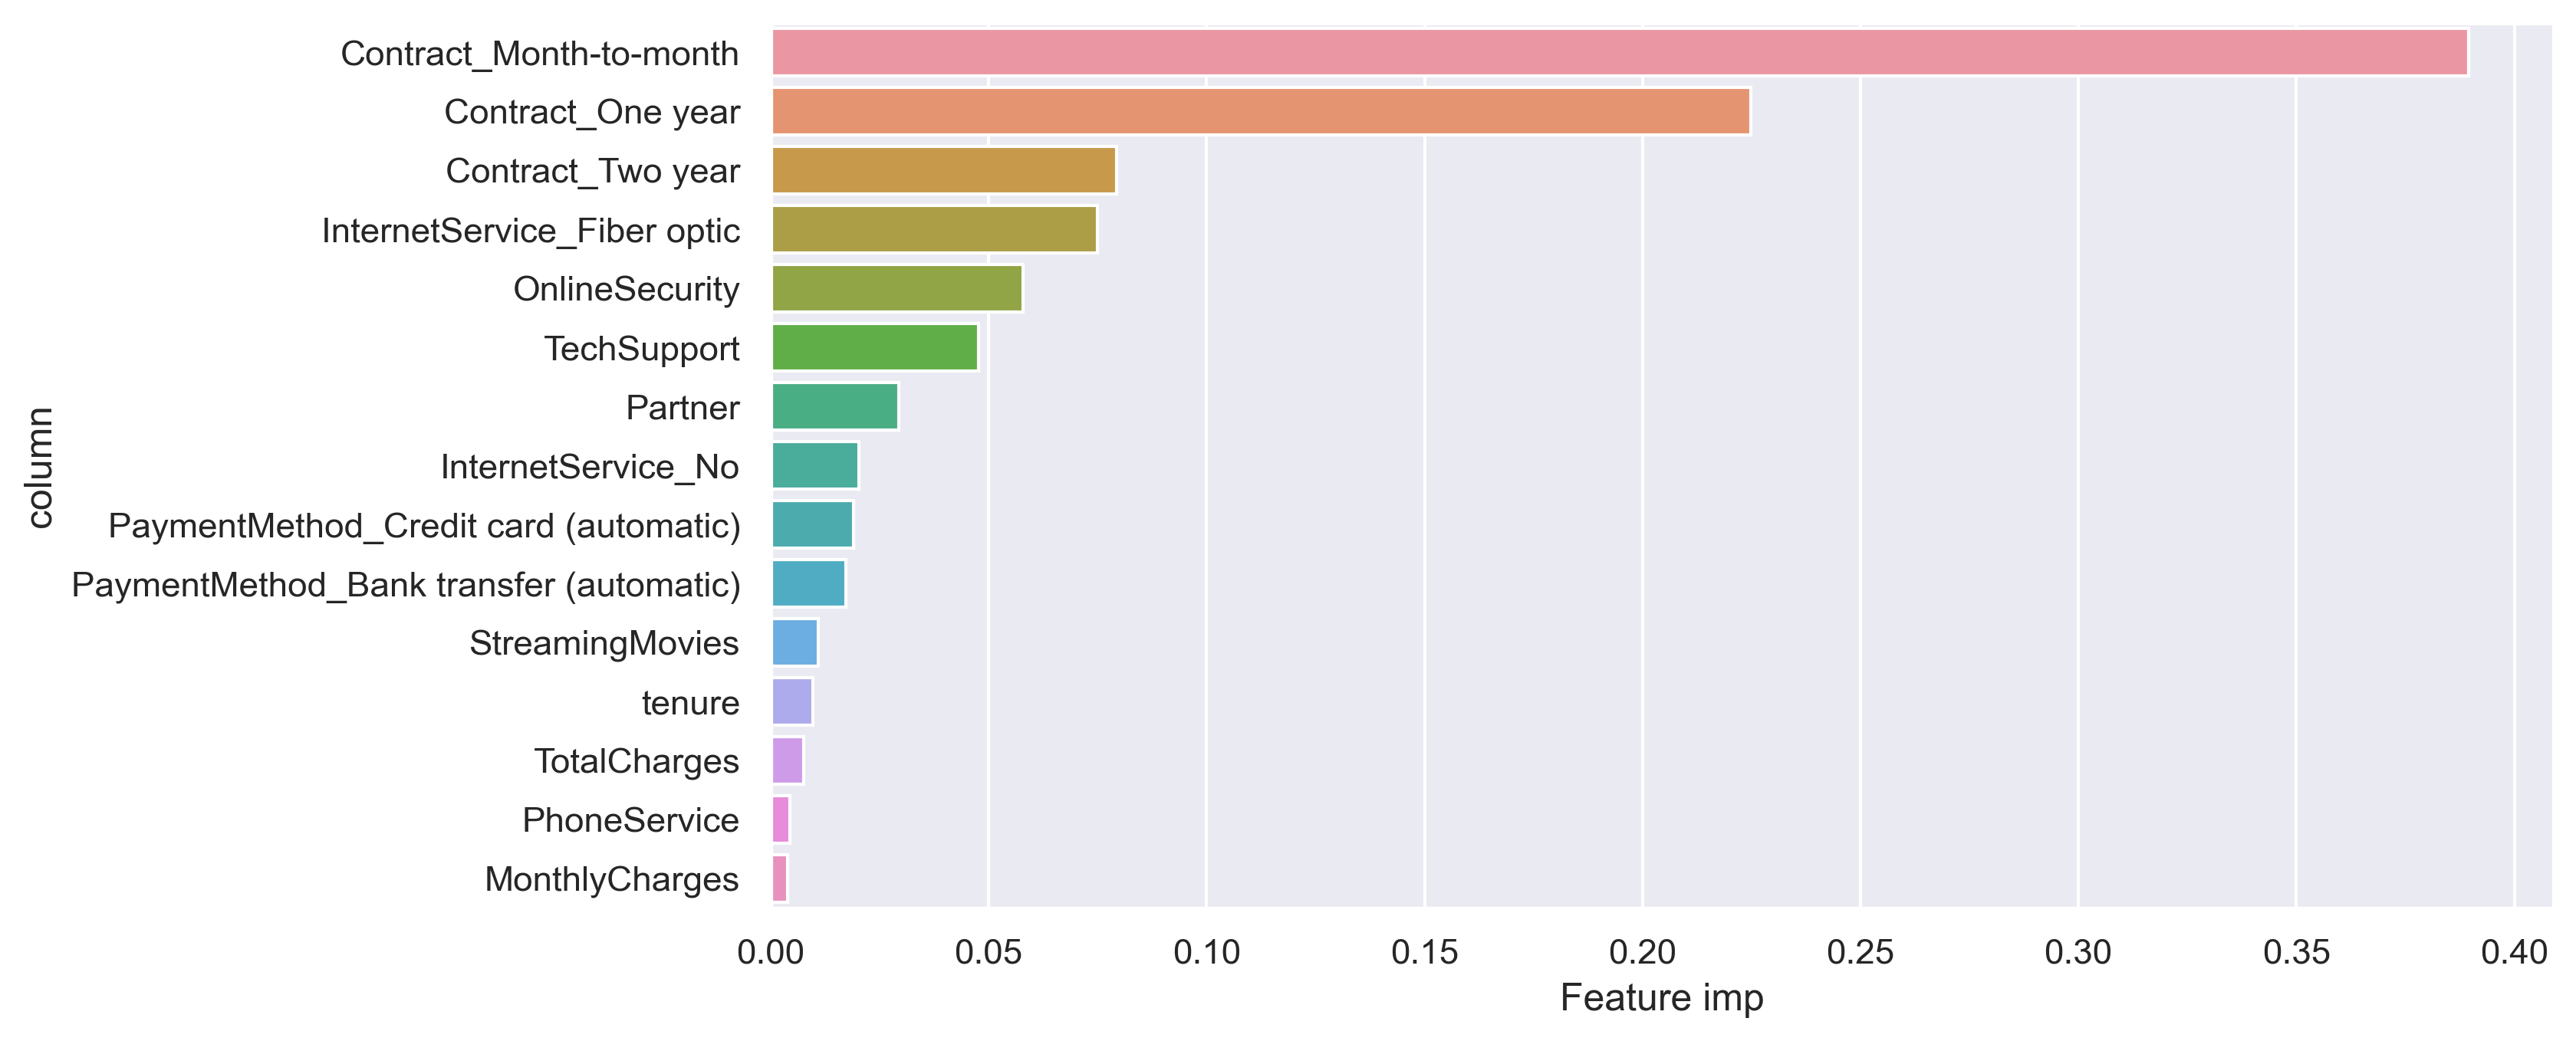

In [113]:
#Display a bar plot of the top 15 features and their importances.

imp_feature=dt3_model.feature_importances_

fea_sel=pd.DataFrame({'column':x_sm.columns,
                     'Feature imp':imp_feature}).sort_values(by='Feature imp',
                      ascending=False)

fea_sel=fea_sel.head(15)

sns.barplot(data=fea_sel,y='column',x='Feature imp')

In [114]:
params = {
    'criterion' : ['gini','entropy'],
    'max_depth' : [6,9,14,16],
    'min_samples_split' : [2,4,8,10],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'min_samples_leaf' : [2,6,10]
}

In [115]:
grid = GridSearchCV(RandomForestClassifier(), param_grid=params, verbose=-1)

grid.fit(xtrain,ytrain)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 9, 14, 16],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 6, 10],
                         'min_samples_split': [2, 4, 8, 10]},
             verbose=-1)

In [116]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 14,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [117]:
rf1_model=model_building(RandomForestClassifier(criterion='gini',
                                                max_depth= 14,
                                                min_samples_split= 2,
                                                max_features='auto',
                                                min_samples_leaf= 2 )
                         ,x_st,y_sm)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      3873
           1       0.83      0.84      0.83      3872

    accuracy                           0.83      7745
   macro avg       0.83      0.83      0.83      7745
weighted avg       0.83      0.83      0.83      7745

confusion matrix: 
[[3190  683]
 [ 620 3252]]
trainning accuracy: 0.9383959705540488 testing accuracy: 0.8317624273724984


In [118]:
rf1_recall=recall_score(rf1_model[1],rf1_model[2])
rf1_recall

0.8398760330578512

## Feature Selection

In [119]:
from sklearn.feature_selection import SelectKBest, chi2, RFE


In [120]:
l1 = Lasso(alpha=1)
l1.fit(xtrain,ytrain)
print(f"{l1.score(xtrain,ytrain)} {l1.score(xtest,ytest)}")


0.2611654738179118 0.282207289171011


In [121]:
l1.coef_

array([-0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.00109897, -0.        ,  0.        ,  0.00766208,
       -0.00010102,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        ])

In [122]:
rfe=RFE(LogisticRegression())
rfe.fit(x_st,y_sm)
rfe.ranking_

array([ 9,  1,  6,  7,  1,  2,  5, 13, 14, 12, 10,  1,  1, 11,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  4,  3,  8])

In [123]:
# Create an instance of the SelectKBest class with chi2 score function and k value of 5
test = SelectKBest(score_func=chi2, k=5)

# Fit the SelectKBest object to the data x_sm and the target variable y_sm
test.fit(x_sm,y_sm)

# Get the scores calculated by the SelectKBest object
test.scores_


array([1.22841476e+01, 8.05680751e+02, 3.35221201e+02, 2.68788006e+02,
       7.63786372e+02, 4.27730632e+00, 3.82007014e+00, 9.77345372e+01,
       3.89473684e+00, 6.03092025e+02, 7.90466006e+02, 3.71262935e+04,
       3.11120680e-02, 6.59287334e+01, 7.11056786e+03, 1.29061084e+06,
       6.97077484e+02, 7.51870527e+02, 1.45463198e+03, 5.63888476e+02,
       6.28721695e+02, 3.10491377e+02, 3.07339130e+02, 2.90566879e+02,
       5.55215199e+02, 7.83674251e+02])

In [124]:
# Creating a DataFrame to store feature selection information

fea_sel=pd.DataFrame({
    'feature':x_sm.columns,
    'RFE':rfe.ranking_,
    'Importance':dt1_model.feature_importances_,
   'CHI2':test.scores_

})

In [125]:
# Sort the 'fea_sel' DataFrame by the 'CHI2' column in descending order

fea_sel=fea_sel.sort_values(by='CHI2',ascending=False)
fea_sel

feature  RFE  Importance          CHI2
15                             TotalCharges    1    0.037206  1.290611e+06
11                                   tenure    1    0.035826  3.712629e+04
14                           MonthlyCharges    1    0.000000  7.110568e+03
18                        Contract_Two year    1    0.049139  1.454632e+03
1                            OnlineSecurity    1    0.000000  8.056808e+02
10                               Dependents   10    0.000000  7.904660e+02
25                       InternetService_No    8    0.019850  7.836743e+02
4                               TechSupport    1    0.045603  7.637864e+02
17                        Contract_One year    1    0.000000  7.518705e+02
16                  Contract_Month-to-month    1    0.571906  6.970775e+02
20    PaymentMethod_Credit card (automatic)    1    0.000000  6.287217e+02
9                                   Partner   12    0.024364  6.030920e+02
19  PaymentMethod_Bank transfer (automatic)    1    0.000000  5.638885e+02
24              InternetService_Fiber optic    3    0.100490  5.552152e+02
2                              OnlineBackup    6    0.000000  3.352212e+02
21           PaymentMethod_Electronic check    1    0.007945  3.104914e+02
22               PaymentMethod_Mailed check    1    0.000000  3.073391e+02
23                      InternetService_DSL    4    0.000000  2.905669e+02
3                          DeviceProtection    7    0.000000  2.687880e+02
7                                    gender   13    0.000000  9.773454e+01
13                         PaperlessBilling   11    0.010576  6.592873e+01
0                             MultipleLines    9    0.000000  1.228415e+01
5                               StreamingTV    2    0.019385  4.277306e+00
8                             SeniorCitizen   14    0.000000  3.894737e+00
6                           StreamingMovies    5    0.055345  3.820070e+00
12                             PhoneService    1    0.022364  3.111207e-02

## Ensemble Method

In [126]:
from sklearn.ensemble import BaggingClassifier,StackingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier,StackingClassifier
from xgboost import XGBClassifier

In [127]:
bg_model=model_building(BaggingClassifier(base_estimator=KNeighborsClassifier(13),n_estimators=100),x_st,y_sm)

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      3873
           1       0.77      0.89      0.83      3872

    accuracy                           0.81      7745
   macro avg       0.82      0.81      0.81      7745
weighted avg       0.82      0.81      0.81      7745

confusion matrix: 
[[2847 1026]
 [ 416 3456]]
trainning accuracy: 0.8345602479659047 testing accuracy: 0.8138153647514526


In [128]:
bg_recall=recall_score(bg_model[1],bg_model[2])
bg_recall

0.8925619834710744

In [129]:
ad_model=model_building(AdaBoostClassifier(n_estimators=300),x_st,y_sm)

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      3873
           1       0.83      0.85      0.84      3872

    accuracy                           0.84      7745
   macro avg       0.84      0.84      0.84      7745
weighted avg       0.84      0.84      0.84      7745

confusion matrix: 
[[3220  653]
 [ 600 3272]]
trainning accuracy: 0.8756296009298722 testing accuracy: 0.8382182052937379


In [130]:
ad_recall=recall_score(ad_model[1],ad_model[2])
ad_recall

0.8450413223140496

In [131]:
parameter={
    'learning_rate':[0.01,0.02,0.2,0.3],
    'max_depth':[4,6,8],
    'subsample':[0.9,0.5,0.2],
    'n_estimators':[100,400,600]
}

grid=GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=parameter,cv=2,n_jobs=-1)

grid.fit(xtrain,ytrain)

grid.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_depth=8, n_estimators=600,
                           subsample=0.5)

In [132]:
grid.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 600, 'subsample': 0.5}

In [133]:
grid.best_score_

0.8469783057851239

In [134]:
gb_model=model_building(GradientBoostingClassifier(n_estimators=600,learning_rate=0.02,max_depth=8,subsample=0.9),x_sm,y_sm)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      3873
           1       0.84      0.82      0.83      3872

    accuracy                           0.84      7745
   macro avg       0.84      0.84      0.84      7745
weighted avg       0.84      0.84      0.84      7745

confusion matrix: 
[[3287  586]
 [ 681 3191]]
trainning accuracy: 0.9992251065478497 testing accuracy: 0.8364105874757908


In [135]:
gb_recall=recall_score(gb_model[1],gb_model[2])
gb_recall

0.8241219008264463

In [136]:
xgb_model=model_building(XGBClassifier(),x_sm,y_sm)

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      3873
           1       0.85      0.82      0.83      3872

    accuracy                           0.83      7745
   macro avg       0.83      0.83      0.83      7745
weighted avg       0.83      0.83      0.83      7745

confusion matrix: 
[[3298  575]
 [ 711 3161]]
trainning accuracy: 0.9949631925610228 testing accuracy: 0.8339573918657198


In [137]:
xgb_recall=recall_score(xgb_model[1],xgb_model[2])
xgb_recall

0.8163739669421488

In [138]:
models=[]

models.append(('knn',KNeighborsClassifier(13)))

models.append(('lg',LogisticRegression()))

models.append(('decision',DecisionTreeClassifier(criterion= 'gini',
                                                 max_depth= 6,
                                                 max_leaf_nodes= 20, 
                                                 min_samples_leaf= 1,
                                                 min_samples_split= 4,
                                                 splitter= 'best')))


In [139]:
vot_model=model_building(VotingClassifier(estimators=models),x_st,y_sm)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      3873
           1       0.82      0.86      0.84      3872

    accuracy                           0.83      7745
   macro avg       0.83      0.83      0.83      7745
weighted avg       0.83      0.83      0.83      7745

confusion matrix: 
[[3145  728]
 [ 561 3311]]
trainning accuracy: 0.8543200309957381 testing accuracy: 0.8335700451904454


In [140]:
vot_recall=recall_score(vot_model[1],vot_model[2])
vot_recall

0.8551136363636364

In [141]:
st_model=model_building(StackingClassifier(estimators=models,final_estimator=KNeighborsClassifier(13)),x_sm,y_sm)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      3873
           1       0.83      0.80      0.81      3872

    accuracy                           0.82      7745
   macro avg       0.82      0.82      0.82      7745
weighted avg       0.82      0.82      0.82      7745

confusion matrix: 
[[3226  647]
 [ 772 3100]]
trainning accuracy: 0.8357225881441301 testing accuracy: 0.8167850225952227


In [142]:
st_recall=recall_score(st_model[1],st_model[2])
st_recall

0.8006198347107438

In [143]:
fea_sel

feature  RFE  Importance          CHI2
15                             TotalCharges    1    0.037206  1.290611e+06
11                                   tenure    1    0.035826  3.712629e+04
14                           MonthlyCharges    1    0.000000  7.110568e+03
18                        Contract_Two year    1    0.049139  1.454632e+03
1                            OnlineSecurity    1    0.000000  8.056808e+02
10                               Dependents   10    0.000000  7.904660e+02
25                       InternetService_No    8    0.019850  7.836743e+02
4                               TechSupport    1    0.045603  7.637864e+02
17                        Contract_One year    1    0.000000  7.518705e+02
16                  Contract_Month-to-month    1    0.571906  6.970775e+02
20    PaymentMethod_Credit card (automatic)    1    0.000000  6.287217e+02
9                                   Partner   12    0.024364  6.030920e+02
19  PaymentMethod_Bank transfer (automatic)    1    0.000000  5.638885e+02
24              InternetService_Fiber optic    3    0.100490  5.552152e+02
2                              OnlineBackup    6    0.000000  3.352212e+02
21           PaymentMethod_Electronic check    1    0.007945  3.104914e+02
22               PaymentMethod_Mailed check    1    0.000000  3.073391e+02
23                      InternetService_DSL    4    0.000000  2.905669e+02
3                          DeviceProtection    7    0.000000  2.687880e+02
7                                    gender   13    0.000000  9.773454e+01
13                         PaperlessBilling   11    0.010576  6.592873e+01
0                             MultipleLines    9    0.000000  1.228415e+01
5                               StreamingTV    2    0.019385  4.277306e+00
8                             SeniorCitizen   14    0.000000  3.894737e+00
6                           StreamingMovies    5    0.055345  3.820070e+00
12                             PhoneService    1    0.022364  3.111207e-02

In [144]:
x_imp=x_sm.drop(columns={'MultipleLines','StreamingMovies','SeniorCitizen','StreamingTV',
                         'PhoneService','PaperlessBilling',\
                        'gender','InternetService_DSL','DeviceProtection','OnlineBackup',\
                       'Partner','Dependents','InternetService_No','PhoneService','MonthlyCharges'})

In [145]:
x_imp_st=sc.fit_transform(x_imp)

In [146]:
pca1=PCA()
pcs=pca1.fit_transform(x_imp_st)
csum=pca1.explained_variance_ratio_

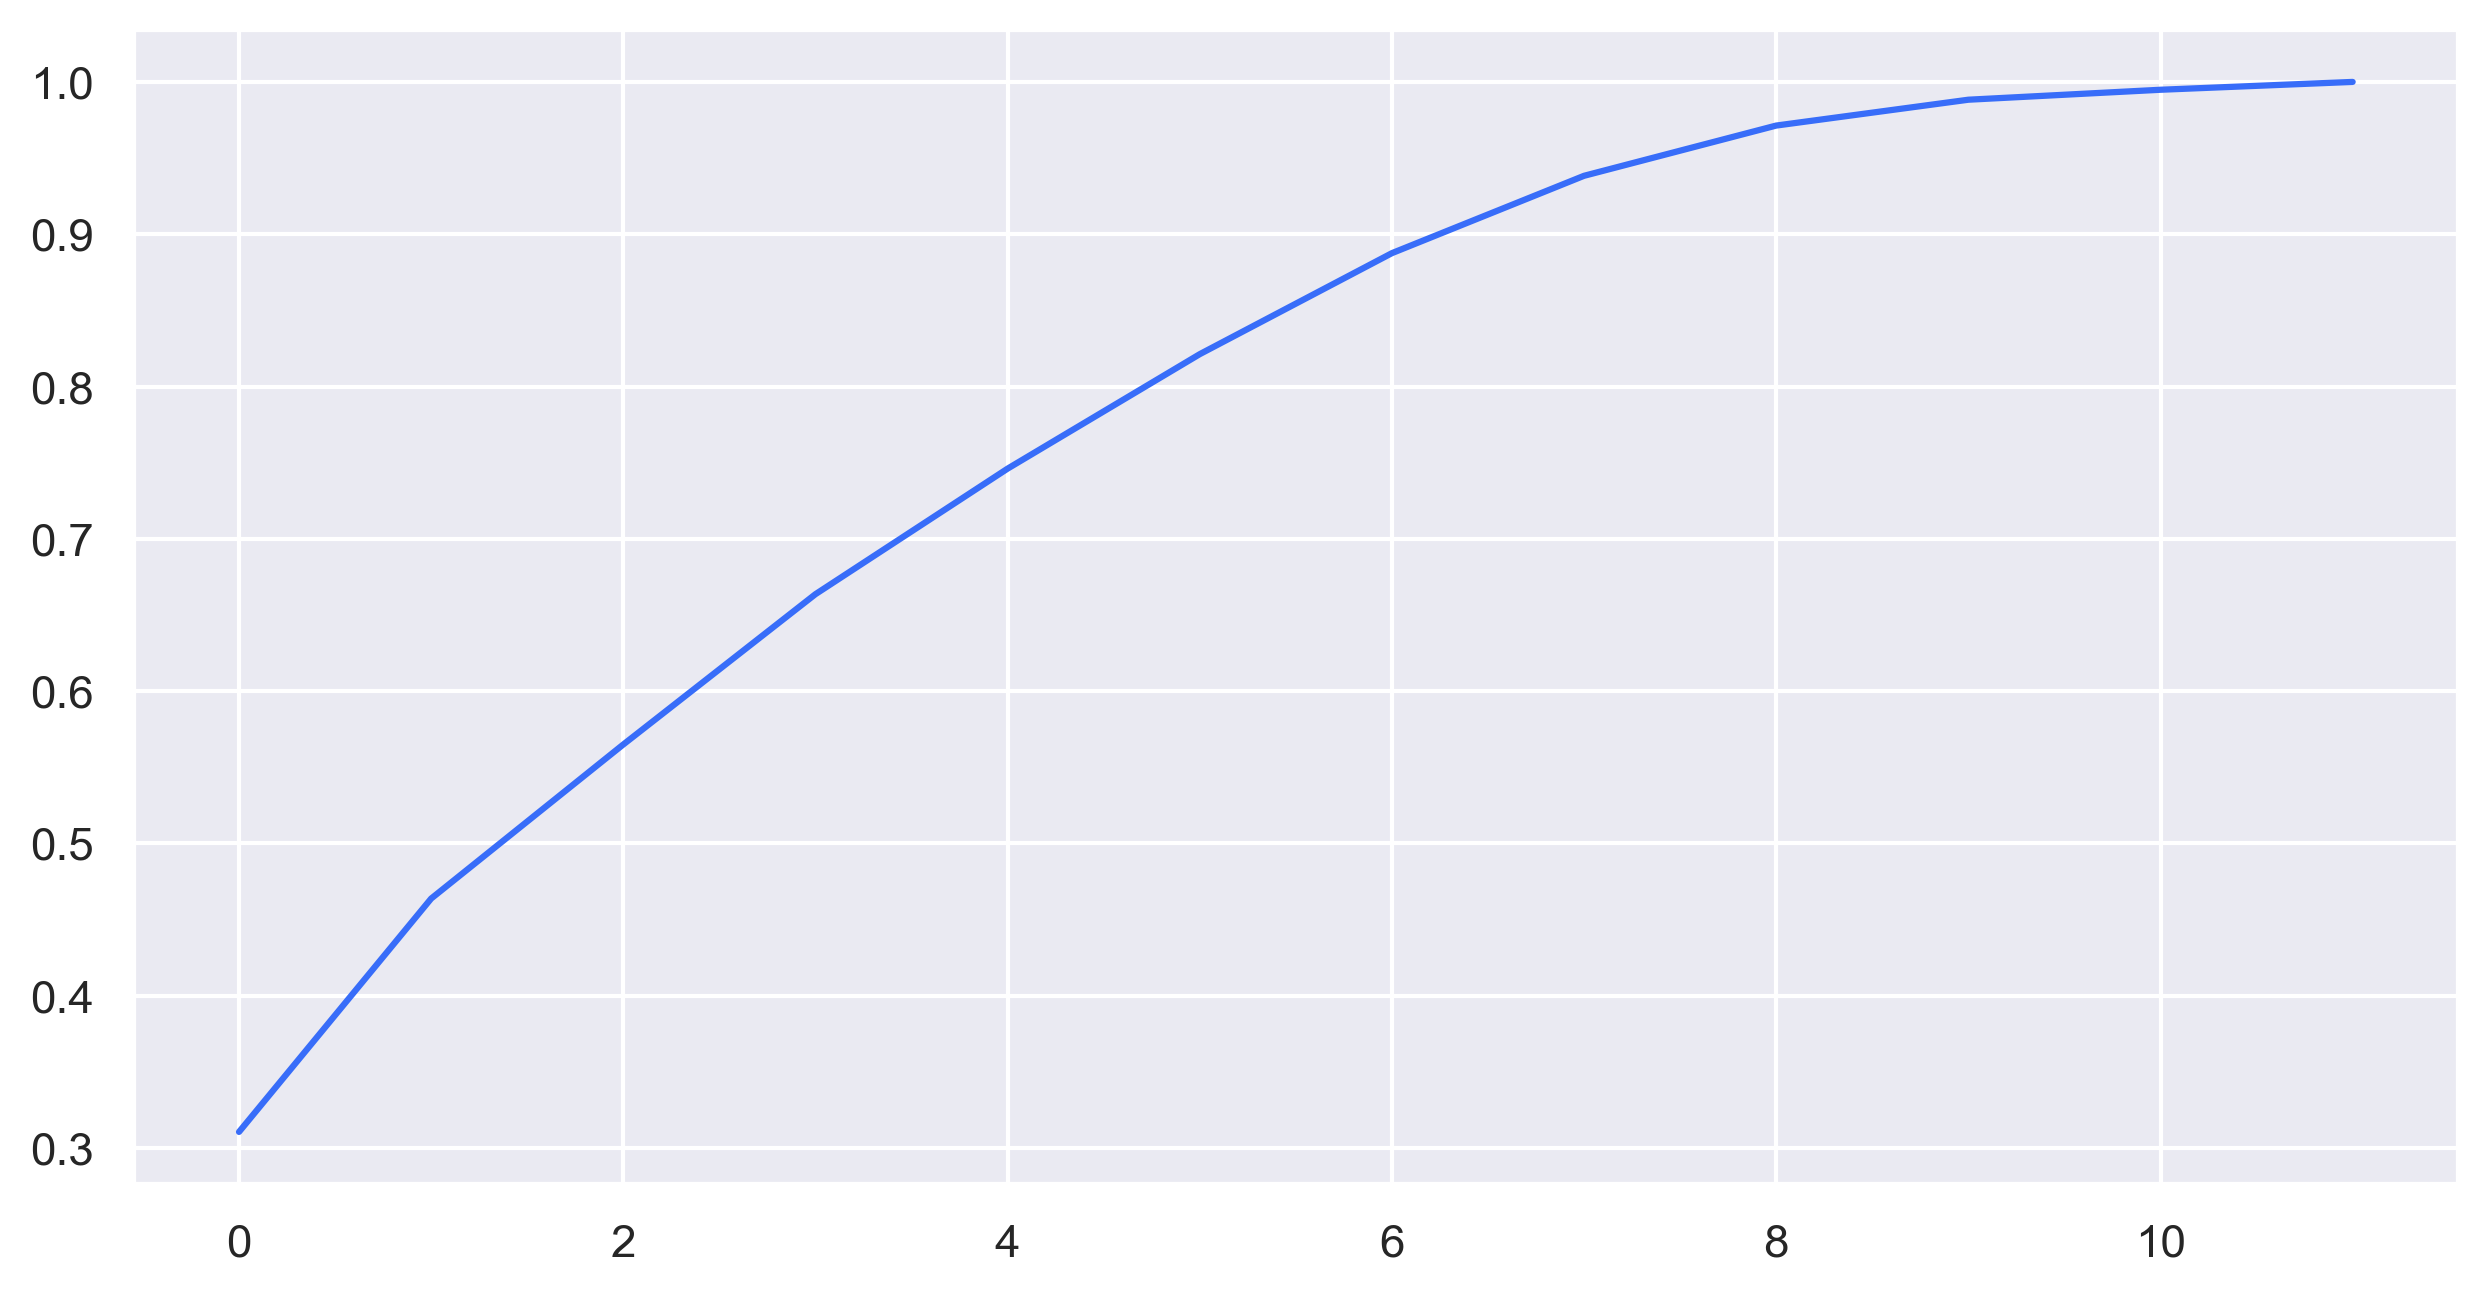

In [147]:
plt.plot(np.cumsum(csum))

In [148]:
pca1=PCA(n_components=8)
x_imp_st_pca=pca1.fit_transform(x_imp_st)
x_imp_st_pca=pd.DataFrame(x_imp_st_pca)
x_imp_st_pca

0         1         2         3         4         5         6  \
0     -2.064421  0.056650 -0.057377 -0.097279  0.230115  0.045251 -1.555993   
1      1.361652  2.257851  2.586070  0.166160  1.273313 -0.158417  0.436708   
2     -1.025948  2.323065 -0.063599 -0.086764  1.631882  1.073958  0.722211   
3      2.945110  0.727775  1.957443  2.042341  0.252578  2.172339 -0.919075   
4     -2.186048 -1.104635 -0.031893 -0.070807  0.188461 -0.131949 -0.414672   
...         ...       ...       ...       ...       ...       ...       ...   
10321 -2.217120 -1.087513 -0.030268 -0.071576  0.187261 -0.116423 -0.426784   
10322 -1.582562 -0.269305 -0.249150  0.022414 -0.586111  0.216899  0.793186   
10323 -2.218057 -1.086699 -0.030275 -0.071589  0.187061 -0.116081 -0.427496   
10324 -2.219003 -1.085878 -0.030282 -0.071603  0.186860 -0.115736 -0.428214   
10325 -1.830839 -1.314498 -0.047814 -0.062472  0.209936 -0.303438 -0.259757   

              7  
0     -0.024569  
1     -1.691234  
2     -1.655635  
3      0.142726  
4      0.052544  
...         ...  
10321  0.056850  
10322  0.074287  
10323  0.056919  
10324  0.056988  
10325  0.006223  

[10326 rows x 8 columns]

In [149]:
knnimp_model=model_building(KNeighborsClassifier(12),x_imp_st,y_sm)

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      3873
           1       0.86      0.76      0.81      3872

    accuracy                           0.82      7745
   macro avg       0.82      0.82      0.82      7745
weighted avg       0.82      0.82      0.82      7745

confusion matrix: 
[[3390  483]
 [ 912 2960]]
trainning accuracy: 0.8411468423091825 testing accuracy: 0.8198837959974177


In [150]:
knnimp_recall=recall_score(knnimp_model[1],knnimp_model[2])
knnimp_recall

0.7644628099173554

In [151]:
lg6_model=model_building(LogisticRegression(),x_imp_st,y_sm)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      3873
           1       0.82      0.86      0.84      3872

    accuracy                           0.84      7745
   macro avg       0.84      0.84      0.84      7745
weighted avg       0.84      0.84      0.84      7745

confusion matrix: 
[[3151  722]
 [ 536 3336]]
trainning accuracy: 0.839984502130957 testing accuracy: 0.837572627501614


In [152]:
lg6_recall=recall_score(lg6_model[1],lg6_model[2])
lg6_recall

0.8615702479338843

In [153]:
svm2_model=model_building(SVC(),x_imp_st,y_sm)


              precision    recall  f1-score   support

           0       0.83      0.81      0.82      3873
           1       0.82      0.84      0.83      3872

    accuracy                           0.82      7745
   macro avg       0.82      0.82      0.82      7745
weighted avg       0.82      0.82      0.82      7745

confusion matrix: 
[[3143  730]
 [ 631 3241]]
trainning accuracy: 0.8361100348702053 testing accuracy: 0.8242737249838605


In [154]:
svm2_recall=recall_score(svm2_model[1],svm2_model[2])
svm2_recall

0.8370351239669421

In [155]:
dt4_model=model_building(DecisionTreeClassifier(criterion= 'gini',
                                                max_depth= 6,max_leaf_nodes= 20, 
                                                min_samples_leaf= 5,min_samples_split= 12,
                                                splitter= 'random', class_weight='balanced',
                                                random_state=10),x_imp_st,y_sm)


              precision    recall  f1-score   support

           0       0.82      0.80      0.81      3873
           1       0.80      0.83      0.82      3872

    accuracy                           0.81      7745
   macro avg       0.81      0.81      0.81      7745
weighted avg       0.81      0.81      0.81      7745

confusion matrix: 
[[3082  791]
 [ 658 3214]]
trainning accuracy: 0.8229368461836497 testing accuracy: 0.812911555842479


In [156]:
dt4_recall=recall_score(dt4_model[1],dt4_model[2])
dt4_recall

0.8300619834710744

In [157]:
sel_model=pd.DataFrame({
    
    'model_name':['Logistic_regression','Logistic_regression','Logistic_regression',\
                  'Logistic_regression','Logistic_regression','Logistic_regression','Decision_tree',\
                  'Decision_tree','Decision_tree','Decision_tree','Decision_tree',\
                  'Random_forest','Random_forest','SVM','SVM','SVM','KNN','KNN','KNN','KNN','KNN',\
                  'baggingclassifier','Adabost','Gradient Boosting',\
                  'Xgradient boosting','voting classifier','stacking_classifier'],
    'recall':[lg1_recall,lg_recall,lg3_recall,lg4_recall,lg5_recall,lg6_recall,\
              dt_recall,dt1_recall,dt2_recall,dt3_recall,dt4_recall,rf_recall,rf1_recall,\
               svm_recall,svm1_recall,svm2_recall,knn_recall,knnimp_recall,knnpca_recall,\
              knnpca1_recall,knnpca2_recall,bg_recall,ad_recall,\
              gb_recall,xgb_recall,vot_recall,st_recall]
})

sel_model.sort_values(by='recall',ascending=False)

model_name    recall
21    baggingclassifier  0.892562
20                  KNN  0.891271
19                  KNN  0.871643
5   Logistic_regression  0.861570
25    voting classifier  0.855114
22              Adabost  0.845041
12        Random_forest  0.839876
4   Logistic_regression  0.839618
16                  KNN  0.838843
15                  SVM  0.837035
18                  KNN  0.831095
10        Decision_tree  0.830062
3   Logistic_regression  0.829804
11        Random_forest  0.826963
23    Gradient Boosting  0.824122
24   Xgradient boosting  0.816374
14                  SVM  0.811725
13                  SVM  0.811725
2   Logistic_regression  0.808626
9         Decision_tree  0.802479
26  stacking_classifier  0.800620
7         Decision_tree  0.782609
8         Decision_tree  0.771178
17                  KNN  0.764463
0   Logistic_regression  0.595153
1   Logistic_regression  0.539943
6         Decision_tree  0.493581

## FINAL MODEL

In [230]:
knn_final=model_building(KNeighborsClassifier(13),x_st,y_sm)

              precision    recall  f1-score   support

           0       0.87      0.73      0.80      3873
           1       0.77      0.89      0.83      3872

    accuracy                           0.81      7745
   macro avg       0.82      0.81      0.81      7745
weighted avg       0.82      0.81      0.81      7745

confusion matrix: 
[[2838 1035]
 [ 421 3451]]
trainning accuracy: 0.8333979077876792 testing accuracy: 0.8120077469335055


In [173]:
lg6_model=model_building(LogisticRegression(),x_imp_st,y_sm)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      3873
           1       0.82      0.86      0.84      3872

    accuracy                           0.84      7745
   macro avg       0.84      0.84      0.84      7745
weighted avg       0.84      0.84      0.84      7745

confusion matrix: 
[[3151  722]
 [ 536 3336]]
trainning accuracy: 0.839984502130957 testing accuracy: 0.837572627501614


In [193]:
xtrain,xtest,ytrain,ytest=train_test_split(x_imp_st,y_sm,train_size=0.25,random_state=2)

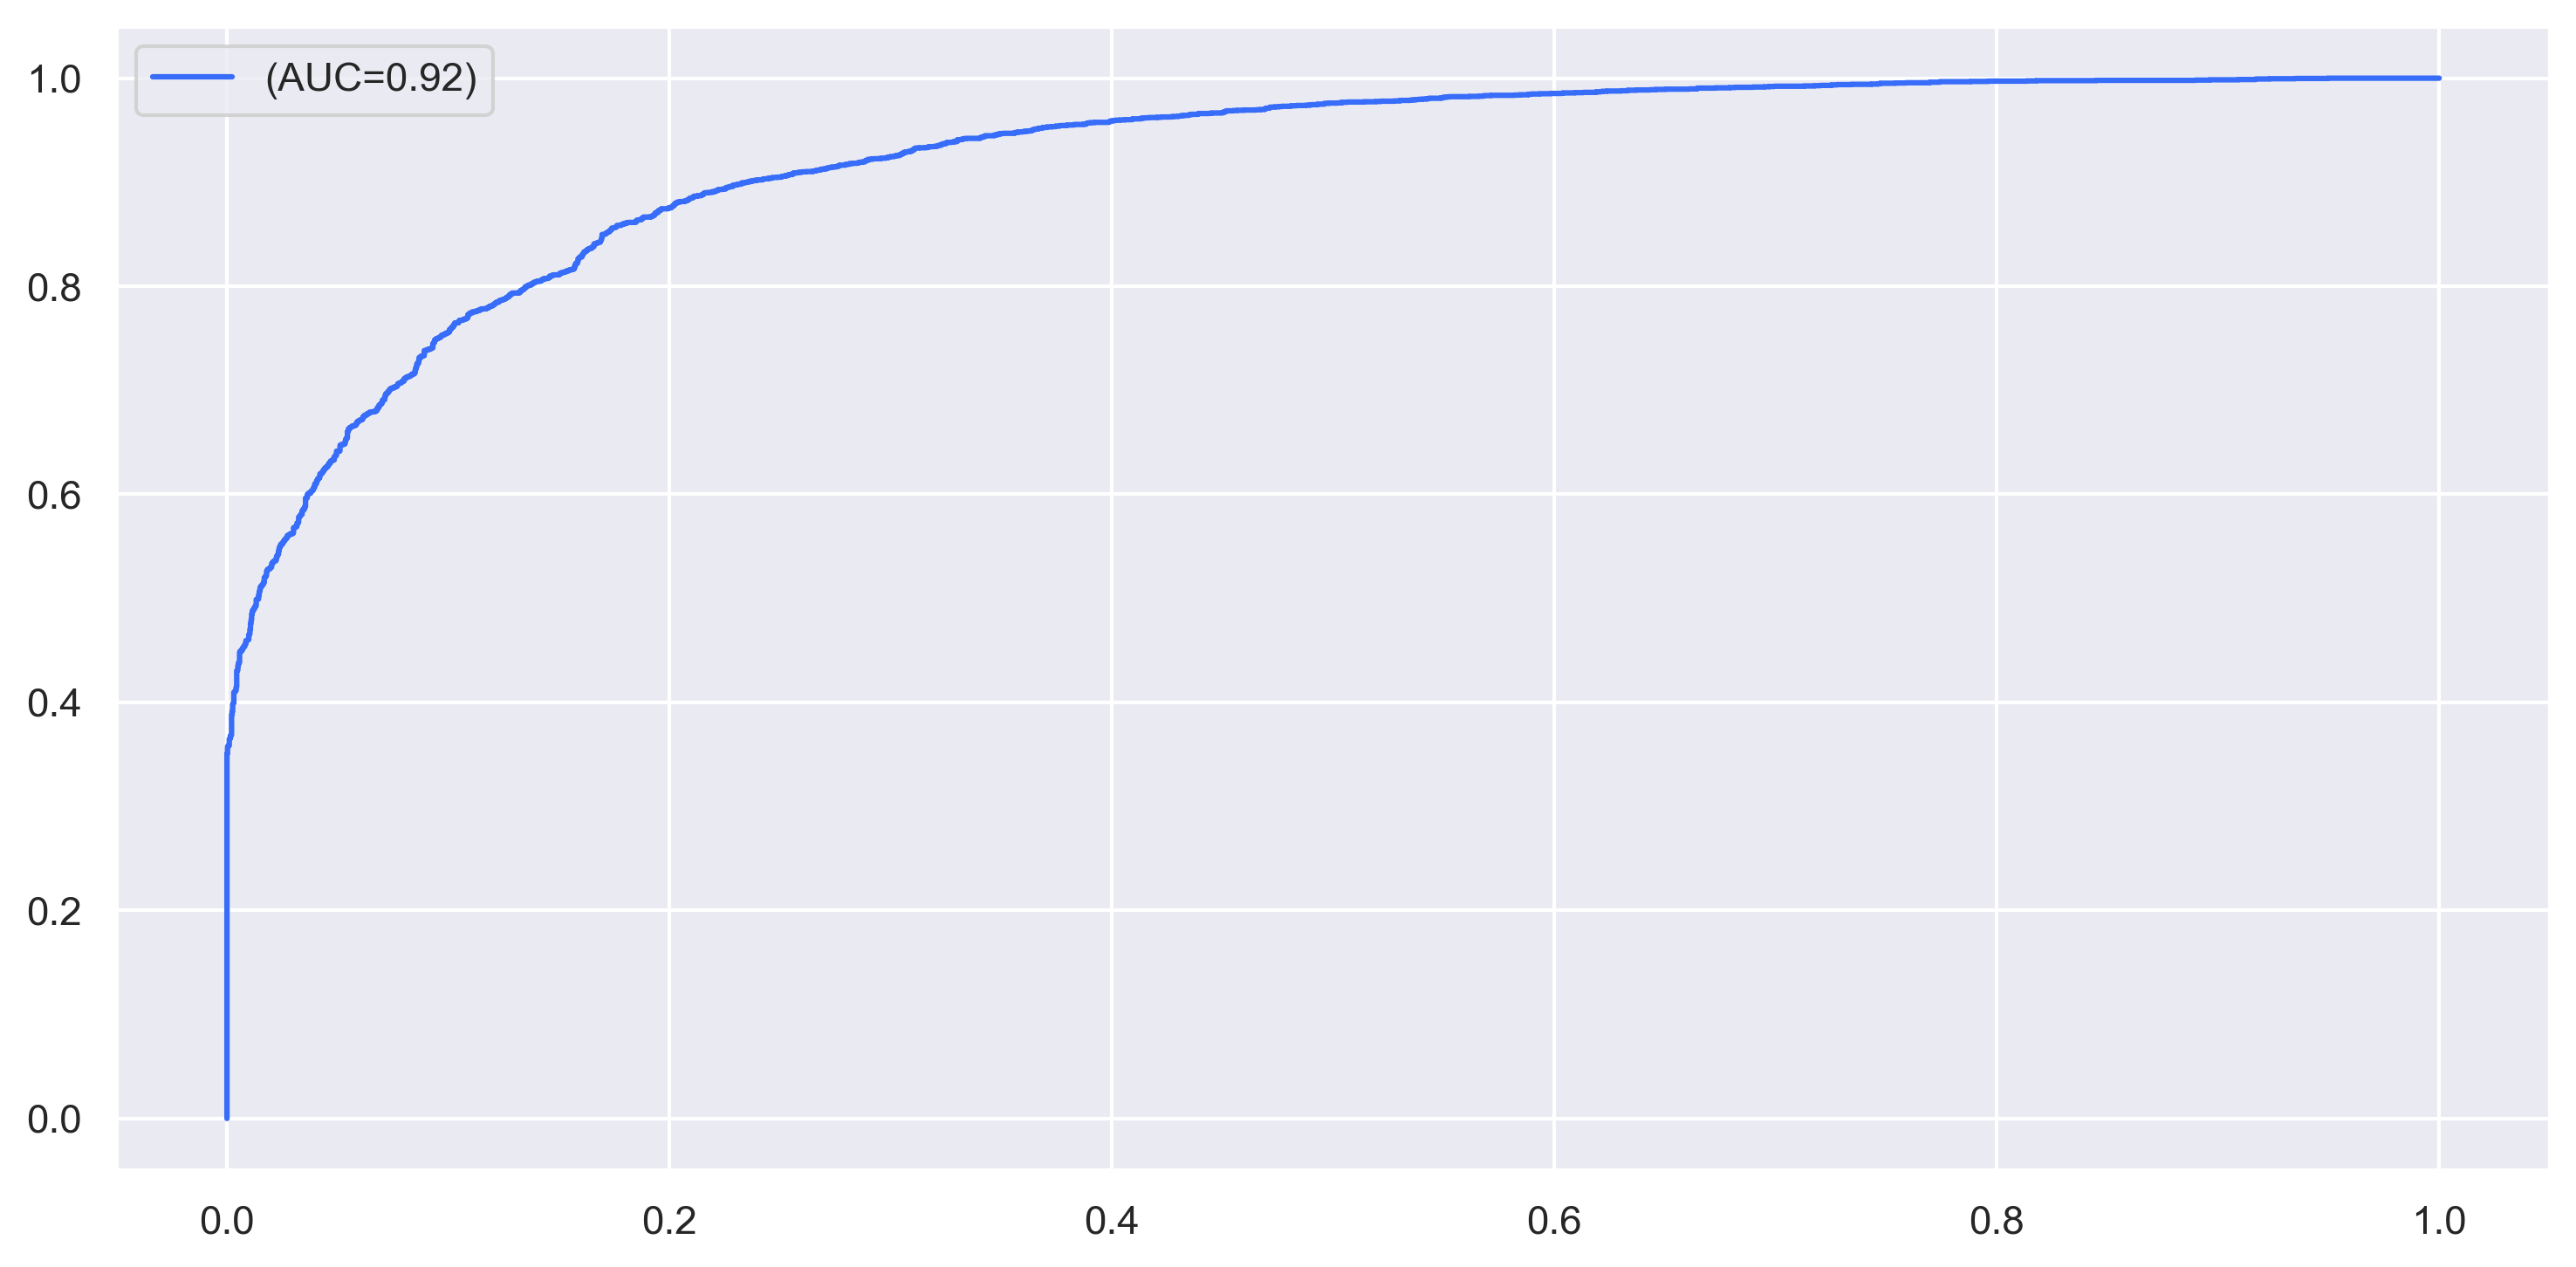

In [194]:
lg=LogisticRegression()
model=lg.fit(xtrain,ytrain)

proba=model.predict_proba(xtest)[:,1]

#fpr : List of false positive rates.
#tpr : List of true positive rates.
#auc : Area under the ROC curve.
auc=roc_auc_score(ytest,proba)

fpr,tpr,thresh=roc_curve(ytest,proba)

plt.rcParams['figure.figsize'] = (10,5)
plt.plot(fpr,tpr,label='(AUC=%0.2f)'%auc)
plt.legend()
plt.tight_layout()


In [198]:
accuracy=[]
recall=[]
for i in thresh:
    ypred=np.where(proba>i,1,0)
    accuracy.append(accuracy_score(ytest,ypred))
    recall.append(recall_score(ytest,ypred))

final_threshod=pd.DataFrame({
    'thresh':thresh,
    'accuracy':accuracy,
    'recall':recall
    
})

final_threshod.sort_values(by='accuracy',ascending=False)

thresh  accuracy    recall
904   0.508048  0.841188  0.858539
903   0.508051  0.841059  0.858282
899   0.508101  0.841059  0.855967
905   0.508040  0.840930  0.858539
898   0.508106  0.840930  0.855710
...        ...       ...       ...
1696  0.003231  0.527050  0.999743
1697  0.003231  0.526921  0.999743
1698  0.000913  0.502130  1.000000
1     0.999824  0.497999  0.000000
0     1.999824  0.497999  0.000000

[1699 rows x 3 columns]

In [226]:
final_threshod[(final_threshod['recall'] > 0.90) & (final_threshod['accuracy'] > 0.832)]

thresh  accuracy    recall
1080  0.442866  0.832408  0.900206
1081  0.442322  0.832537  0.900720
1082  0.441733  0.832279  0.900977
1083  0.441647  0.832150  0.900977
1084  0.440241  0.832021  0.901235
1086  0.439887  0.832021  0.901492

In [227]:
ypred=binarize([proba],threshold=0.4428669)[0]

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      3857
           1       0.79      0.90      0.84      3888

    accuracy                           0.83      7745
   macro avg       0.84      0.83      0.83      7745
weighted avg       0.84      0.83      0.83      7745



In [229]:
print(confusion_matrix(ytest,ypred))
print('trainning accuracy:',model.score(xtrain,ytrain),'testing accuracy:',model.score(xtest,ytest))

[[2947  910]
 [ 388 3500]]
trainning accuracy: 0.8310732274312282 testing accuracy: 0.8384764364105874


In [174]:
x_st.shape,x_imp_st.shape

((10326, 26), (10326, 12))

--**1.In this model get 90% recall value which is best value till now with 83 % accuracy and without overfitting**

--**2.Here this result is with only 12 important feature which is really affecting churn of customer**

**In summary, for telecom customer churn scenarios, where interpretability, resource efficiency, and a balanced trade-off between accuracy and simplicity are crucial, the linear regression model with 12 independent features (90% arecall) would be a suitable choice for deployment.**

In [231]:
import pickle

In [233]:
pickle.dump(model,open('df_final_model.pkl','wb'))